In [1]:
# Name : Sayyed Mudassar Iqbal Shakil Ahmed
# Batch : DSG2404
# Subject : Student Grade Prediction Practice Project Solution

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading our Dataset

In [3]:
df = pd.read_csv("Grades.csv")
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [4]:
df.shape

(571, 43)

Out of 43 columns , we have one target variable "CGPA"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

All columns are Object except CGPA which is float64, also there are missing values which we need to fix

In [6]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
Seat No.             0          0.00
PH-121               0          0.00
HS-101               0          0.00
CY-105               1          0.18
HS-105/12            1          0.18
MT-111               2          0.35
CS-105               0          0.00
CS-106               2          0.35
EL-102               2          0.35
EE-119               2          0.35
ME-107               2          0.35
CS-107               2          0.35
HS-205/20            5          0.88
MT-222               5          0.88
EE-222               7          1.23
MT-224               7          1.23
CS-210               7          1.23
CS-211               5          0.88
CS-203               5          0.88
CS-214               6          1.05
EE-217               6          1.05
CS-212               6          1.05
CS-215               6          1.05
MT-331               9          1.58
EF-303              10          1.75
HS-304              10          1.75
CS-301              10          1.75
CS-302              10          1.75
TC-383              10          1.75
MT-442              10          1.75
EL-332               9          1.58
CS-318               9          1.58
CS-306               9          1.58
CS-312              10          1.75
CS-317              12          2.10
CS-403              12          2.10
CS-421              12          2.10
CS-406              85         14.89
CS-414              13          2.28
CS-419              13          2.28
CS-423              14          2.45
CS-412              79         13.84
CGPA                 0          0.00

The dataset has null values in several columns, however in most cases, there are few null values. The columns with the greatest number of null values are CS-403 with 14.89% (85/571) of null values, then CS-412 with 13.84%(79/571) of null values. The other columns with null values have 2.45% of null values or less.

So far it seems that the columns are categorical in which case we will impute the missing values with the most frequent value.

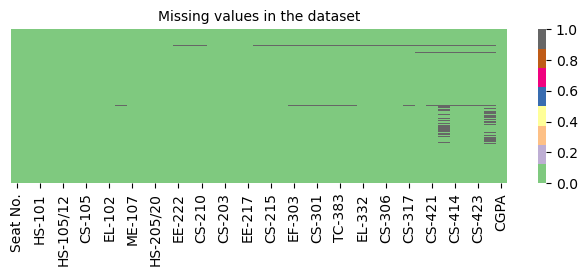

In [7]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

Looking at the plot we can guess that there are rows with more missing values than others

In [8]:
# These are the rows with missing values 
df_filtered = df[df.isnull().any(axis=1)]
df_filtered

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
44   CS-97045      D      C    NaN       NaN    NaN     C-    NaN    NaN   
60   CS-97061      C     B+     WU        D+     C-     B-      F      D   
86   CS-97087      D      D     D+        B-      F      D      D      D   
91   CS-97092     WU     C-      D         D     WU      D      D      D   
137  CS-97138     C-     C+     WU        WU     WU      B     WU     WU   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
423  CS-97424      D     D+      D         D     C-      C     C+     B-   
424  CS-97425     C-     D+     B-        C+     D+     C-     A-     C-   
481  CS-97482     B-     A-     C+         D      B      B     A-     A-   
543  CS-97544      A      B      A        A-     A-      A     B+     B+   
565  CS-97566      F      F      D        C-    NaN     D+      D    NaN   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
44      D+  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
60      A-  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
86      D+  ...     D+      D    NaN    NaN    NaN    NaN    NaN    NaN   
91       C  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
137     A-  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
423      C  ...      D      D     D+      D      D      W      C      B   
424     D+  ...      W      C     B-      F     D+      W      D      B   
481      C  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
543     B+  ...     WU    NaN    NaN      W     WU    NaN    NaN    NaN   
565    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

    CS-412   CGPA  
44     NaN  1.493  
60     NaN  2.418  
86     NaN  1.261  
91     NaN  1.380  
137    NaN  2.653  
..     ...    ...  
423    NaN  1.747  
424    NaN  1.835  
481    NaN  1.896  
543      W  3.607  
565    NaN  0.800  

[154 rows x 43 columns]

Dropping rows with more missing values


In [9]:
# let's count how many missing values there are per row
null_count_per_row = df.isnull().sum(axis=1)
df['Null_Count'] = null_count_per_row

# Show the first 15 rows with more null values
null_count_per_row.sort_values(ascending=False).head(15)

44     36
565    35
142    31
143    30
137    30
60     24
288    24
281    20
91     19
282    14
481     9
86      7
543     5
382     1
383     1
dtype: int64

In [10]:
# let's count how many missing values there are per row
null_count_per_row = df.isnull().sum(axis=1)
df['Null_Count'] = null_count_per_row

# Show the first 15 rows with more null values
null_count_per_row.sort_values(ascending=False).head(15)

44     36
565    35
142    31
143    30
137    30
60     24
288    24
281    20
91     19
282    14
481     9
86      7
543     5
382     1
383     1
dtype: int64

Considering we can afford to lose 5% of the data we calculate the threshold = 28. If we also consider that there are 10 rows with 14 up to 36 null values out of 41 which is more than half of the features per row, drop this 10 columns will be the best strategy.

For the other missing values, we can impute with the most frequent value.

In [11]:
display( "Rows with more than 10 missing values: \n", df[df['Null_Count'] > 10 ])

# Drop rows with more than 10 missing values 
df = df[df['Null_Count'] <= 9]

print(f"The rows and columns in the dataset: {df.shape}")

'Rows with more than 10 missing values: \n'

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
44   CS-97045      D      C    NaN       NaN    NaN     C-    NaN    NaN   
60   CS-97061      C     B+     WU        D+     C-     B-      F      D   
91   CS-97092     WU     C-      D         D     WU      D      D      D   
137  CS-97138     C-     C+     WU        WU     WU      B     WU     WU   
142  CS-97143     C+     B-      B        A-      A     A-      C     WU   
143  CS-97144      D      D     WU        WU     WU      D     WU     WU   
281  CS-97282     WU     D+      F         F      F      D    NaN      D   
282  CS-97283     B-     C+     D+         D     A-     B-      B     B+   
288  CS-97289      D     C-      D         C      D      D     B-      F   
565  CS-97566      F      F      D        C-    NaN     D+      D    NaN   

    EE-119  ... CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412  \
44      D+  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
60      A-  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
91       C  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
137     A-  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
142     A-  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
143      D  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
281     WU  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
282    NaN  ...    NaN      D    NaN    NaN    NaN    NaN    NaN    NaN   
288     D+  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
565    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      CGPA Null_Count  
44   1.493         36  
60   2.418         24  
91   1.380         19  
137  2.653         30  
142  2.943         31  
143  1.000         30  
281  1.092         20  
282  2.086         14  
288  0.998         24  
565  0.800         35  

[10 rows x 44 columns]

The rows and columns in the dataset: (561, 44)


In [12]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

# Filter only columns with missing values
missing_val[missing_val['Null values']>0]

Null values  % of missing
CS-312            1          0.18
CS-317            2          0.36
CS-403            3          0.53
CS-421            2          0.36
CS-406           75         13.37
CS-414            3          0.53
CS-419            3          0.53
CS-423            4          0.71
CS-412           69         12.30

# Impute missing values with most frequent value 

In [13]:
# Selecting the columns with missing values
columns_with_missing = df.columns[df.isnull().any()]
columns_with_missing

Index(['CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419',
       'CS-423', 'CS-412'],
      dtype='object')

In [14]:
# Inspect the values present in each column with missing values 
for column in columns_with_missing:
    print(f"Feature {column}:\n{df[column].value_counts()}\n")
    

Feature CS-312:
CS-312
A+    93
A     86
A-    63
D+    52
C     48
C-    44
B+    42
B     37
C+    37
B-    36
D     19
W      1
F      1
WU     1
Name: count, dtype: int64

Feature CS-317:
CS-317
B-    79
B     75
C     70
A-    66
B+    58
C+    57
A     47
C-    41
D+    34
D     16
A+     9
F      7
Name: count, dtype: int64

Feature CS-403:
CS-403
A     133
A-    106
B+     62
B-     55
B      54
D+     35
C      33
C+     32
C-     30
A+     15
D       3
Name: count, dtype: int64

Feature CS-421:
CS-421
B     86
B-    74
C     68
C+    61
C-    60
B+    60
A-    47
D+    36
A     25
D     21
F     17
A+     2
W      2
Name: count, dtype: int64

Feature CS-406:
CS-406
A-    177
A      79
B+     64
B      58
B-     22
C+     22
C      19
D+     14
C-      8
A+      8
F       6
D       5
W       3
WU      1
Name: count, dtype: int64

Feature CS-414:
CS-414
A     176
A-    156
B+     62
B      54
B-     21
A+     21
C+     21
C      20
C-     12
F       7
D+      3
D       3
W     

All the columns with missing values are categorical hence using the mode to impute missing values is correct.

In [15]:
# For each column we use the mode to replace the missing value
for column in columns_with_missing:
    mode_value = df[column].mode()[0]  # Get the mode (most frequent value)
    df[column].fillna(mode_value, inplace=True)
    print(f"In \"{column}\" the missing values were replace by mode: {mode_value}")

In "CS-312" the missing values were replace by mode: A+
In "CS-317" the missing values were replace by mode: B-
In "CS-403" the missing values were replace by mode: A
In "CS-421" the missing values were replace by mode: B
In "CS-406" the missing values were replace by mode: A-
In "CS-414" the missing values were replace by mode: A
In "CS-419" the missing values were replace by mode: A-
In "CS-423" the missing values were replace by mode: A-
In "CS-412" the missing values were replace by mode: A-


In [16]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

# Filter only columns with missing values
display(missing_val[missing_val['Null values']>0])

# Drop the "Null_Count" column
df.drop("Null_Count", axis=1, inplace=True)

Empty DataFrame
Columns: [Null values, % of missing]
Index: []

# Analysis of Features

# Unique values

In [17]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

No. of unique values     type
Seat No.                    561   object
PH-121                       11   object
HS-101                       11   object
CY-105                       11   object
HS-105/12                    11   object
MT-111                       12   object
CS-105                       11   object
CS-106                       11   object
EL-102                       11   object
EE-119                       11   object
ME-107                       11   object
CS-107                       11   object
HS-205/20                    11   object
MT-222                       12   object
EE-222                       12   object
MT-224                       12   object
CS-210                       12   object
CS-211                       12   object
CS-203                       11   object
CS-214                       11   object
EE-217                       12   object
CS-212                       11   object
CS-215                       11   object
MT-331                       12   object
EF-303                       12   object
HS-304                       14   object
CS-301                       12   object
CS-302                       11   object
TC-383                       12   object
MT-442                       12   object
EL-332                       13   object
CS-318                       14   object
CS-306                       13   object
CS-312                       14   object
CS-317                       12   object
CS-403                       11   object
CS-421                       13   object
CS-406                       14   object
CS-414                       13   object
CS-419                       12   object
CS-423                       12   object
CS-412                       13   object
CGPA                        482  float64

About the number of unique values:

Seat No. column has the same unique values as the dataset rows, this column only serves to identify each record but doesn't influence the target variable. So we can drop it.
CGPA is the target variable with 482 unique values of 561 total in the dataset. We are facing a regression problem since the target variable is continuous and numerical.
The other 41 features have a similar behavior, each one has between 11 and 14 unique values corresponding to grades in a string format. Later we need to encode these features in order to train the model.
For now, we will remove the column: Seat No. for the reasons explained previously.

In [18]:
# Dropping the column Id number
df.drop(['Seat No.'], axis=1, inplace=True)
df.sample(10)

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
487      B      C      A        B+     B-      A      B     B-     B+     B-   
459      A      A      A        A+     A+      A     A-      A      A     B+   
67      A-     C-     A-        C-     A-      A     D+     A-     A-     A-   
27       C     C+     D+        D+     C-     B+      D      C      B      B   
73       A     B-     B+        D+     D+     A-      D     B-     A-      A   
489      C     B-     C+        B-     B+     C+     B-     B+     B-      D   
271     B+      A      A        B-     B+     A-      B     C+     C-      D   
133     B-     C-     C-         D     C-     A-     C+     D+     D+     C+   
355      B      B     A-        A-     B+     A-     B+     A+     B-      B   
32       B     C+      A        D+     A-      A     A-      A     A-     A-   

     ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
487  ...     B+      B      A      C      B     A-      A     B-     B+  3.114  
459  ...      A      A      A      A     A+     B+      A      A     A+  3.942  
67   ...     C-     B-     C+     B-     A-      A      B     A-      A  3.189  
27   ...      D      D     C-     C-      B     A-     C+     B-     A-  2.188  
73   ...      C     C+      C     D+     B+     B+     C+     C+     A-  2.340  
489  ...      D      F     A-      F     D+      C      B      F      D  1.886  
271  ...     C+      A     B-     B-     A-     A-     B-     A-      B  2.854  
133  ...      C      C      C      C     A-     A-     C+      C     B+  2.379  
355  ...     A+     B+     A-      B     A-      A      B      A      B  3.392  
32   ...     C+      B      B     C-      A     A-     B+     B-     B+  3.220  

[10 rows x 42 columns]

In [19]:
# checking the new dimension of the dataset

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (561, 42)

The column headers in the dataset: Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')


In [20]:
# Inspect the values present in each column with missing values 
for column in df.columns[:-1]:
    print(f"Feature {column}:\n{df[column].value_counts()}\n")


Feature PH-121:
PH-121
A-    112
A     111
B+     61
B      57
B-     55
D      41
C      32
C+     30
D+     22
A+     22
C-     18
Name: count, dtype: int64

Feature HS-101:
HS-101
A-    82
B-    77
C     67
B     63
B+    58
C-    48
C+    45
D     44
A     38
D+    35
A+     4
Name: count, dtype: int64

Feature CY-105:
CY-105
A     177
A-    120
B+     50
B      48
B-     42
A+     31
D      28
C      19
C+     17
C-     16
D+     13
Name: count, dtype: int64

Feature HS-105/12:
HS-105/12
A     96
A-    74
B+    70
B     57
D     43
C     40
B-    40
C+    39
C-    35
A+    34
D+    33
Name: count, dtype: int64

Feature MT-111:
MT-111
A-    104
A      99
B-     70
B+     62
B      55
C-     38
C+     33
C      30
D      25
A+     23
D+     21
F       1
Name: count, dtype: int64

Feature CS-105:
CS-105
A     151
A-    133
B+     60
B      50
A+     43
B-     36
C+     23
C      22
C-     21
D+     14
D       8
Name: count, dtype: int64

Feature CS-106:
CS-106
A-    116
B+    101
B  

In [21]:
# Summary statistics of numerical columns
stats = df.describe()
stats

CGPA
count  561.000000
mean     2.977501
std      0.594160
min      1.261000
25%      2.564000
50%      3.042000
75%      3.458000
max      3.985000

The only numerical variable is CGPA, the target variable. The median(50%) is greater than the mean, which means the data is skewed to the left. The minimum value of CGPA is 1.261 and the maximum value 3.985.

In [22]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
count     561    561    561       561    561    561    561    561    561   
unique     11     11     11        11     12     11     11     11     11   
top        A-     A-      A         A     A-      A     A-     A-     A-   
freq      112     82    177        96    104    151    116    105    134   

       ME-107  ... CS-306 CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419  \
count     561  ...    561    561    561    561    561    561    561    561   
unique     11  ...     13     14     12     11     13     14     13     12   
top        A-  ...     A-     A+     B-      A      B     A-      A     A-   
freq       79  ...    120     94     81    136     88    252    179    123   

       CS-423 CS-412  
count     561    561  
unique     12     13  
top        A-     A-  
freq      126    226  

[4 rows x 41 columns]

In [23]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 42)

There are no duplicate values in the dataset.

# Data Analysis

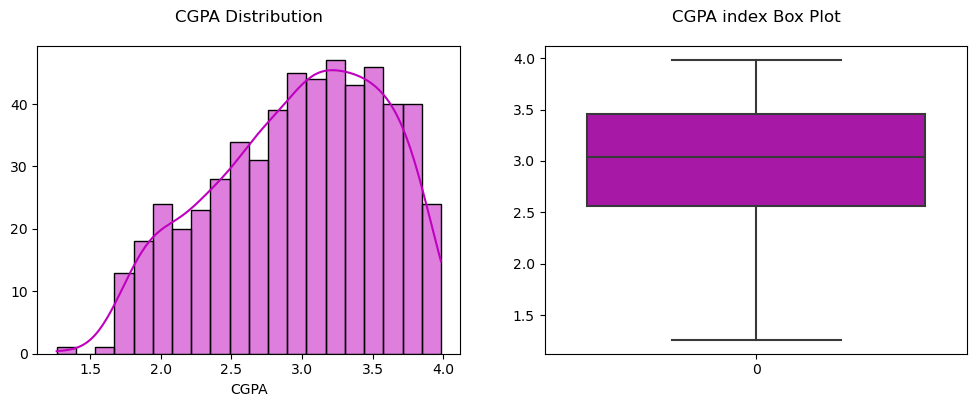

Skewness of CGPA : -0.3554277377610981


In [24]:
#Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['CGPA'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['CGPA'], ax=axes[1], color='m')

axes[0].set_title('CGPA Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('CGPA index Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of RI
print(f"Skewness of CGPA : {df.CGPA.skew()}")

The distribution of CGPA is skewed to the left. There are not outliers present in the Box plot of CGPA.

# independent Variables

In [25]:
categorical_col = df.columns[:-1] 
categorical_col

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [26]:
# Getting all the possible unique values in the dataset features
arr = []

for col in categorical_col:
    arr.extend(df[col].unique())

pd.Series(arr).unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'A+', 'F',
       'WU', 'W'], dtype=object)

In [27]:
# Transform to ordered categories
order_cat = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F', 'WU', 'W' ]

for col in categorical_col:
    df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

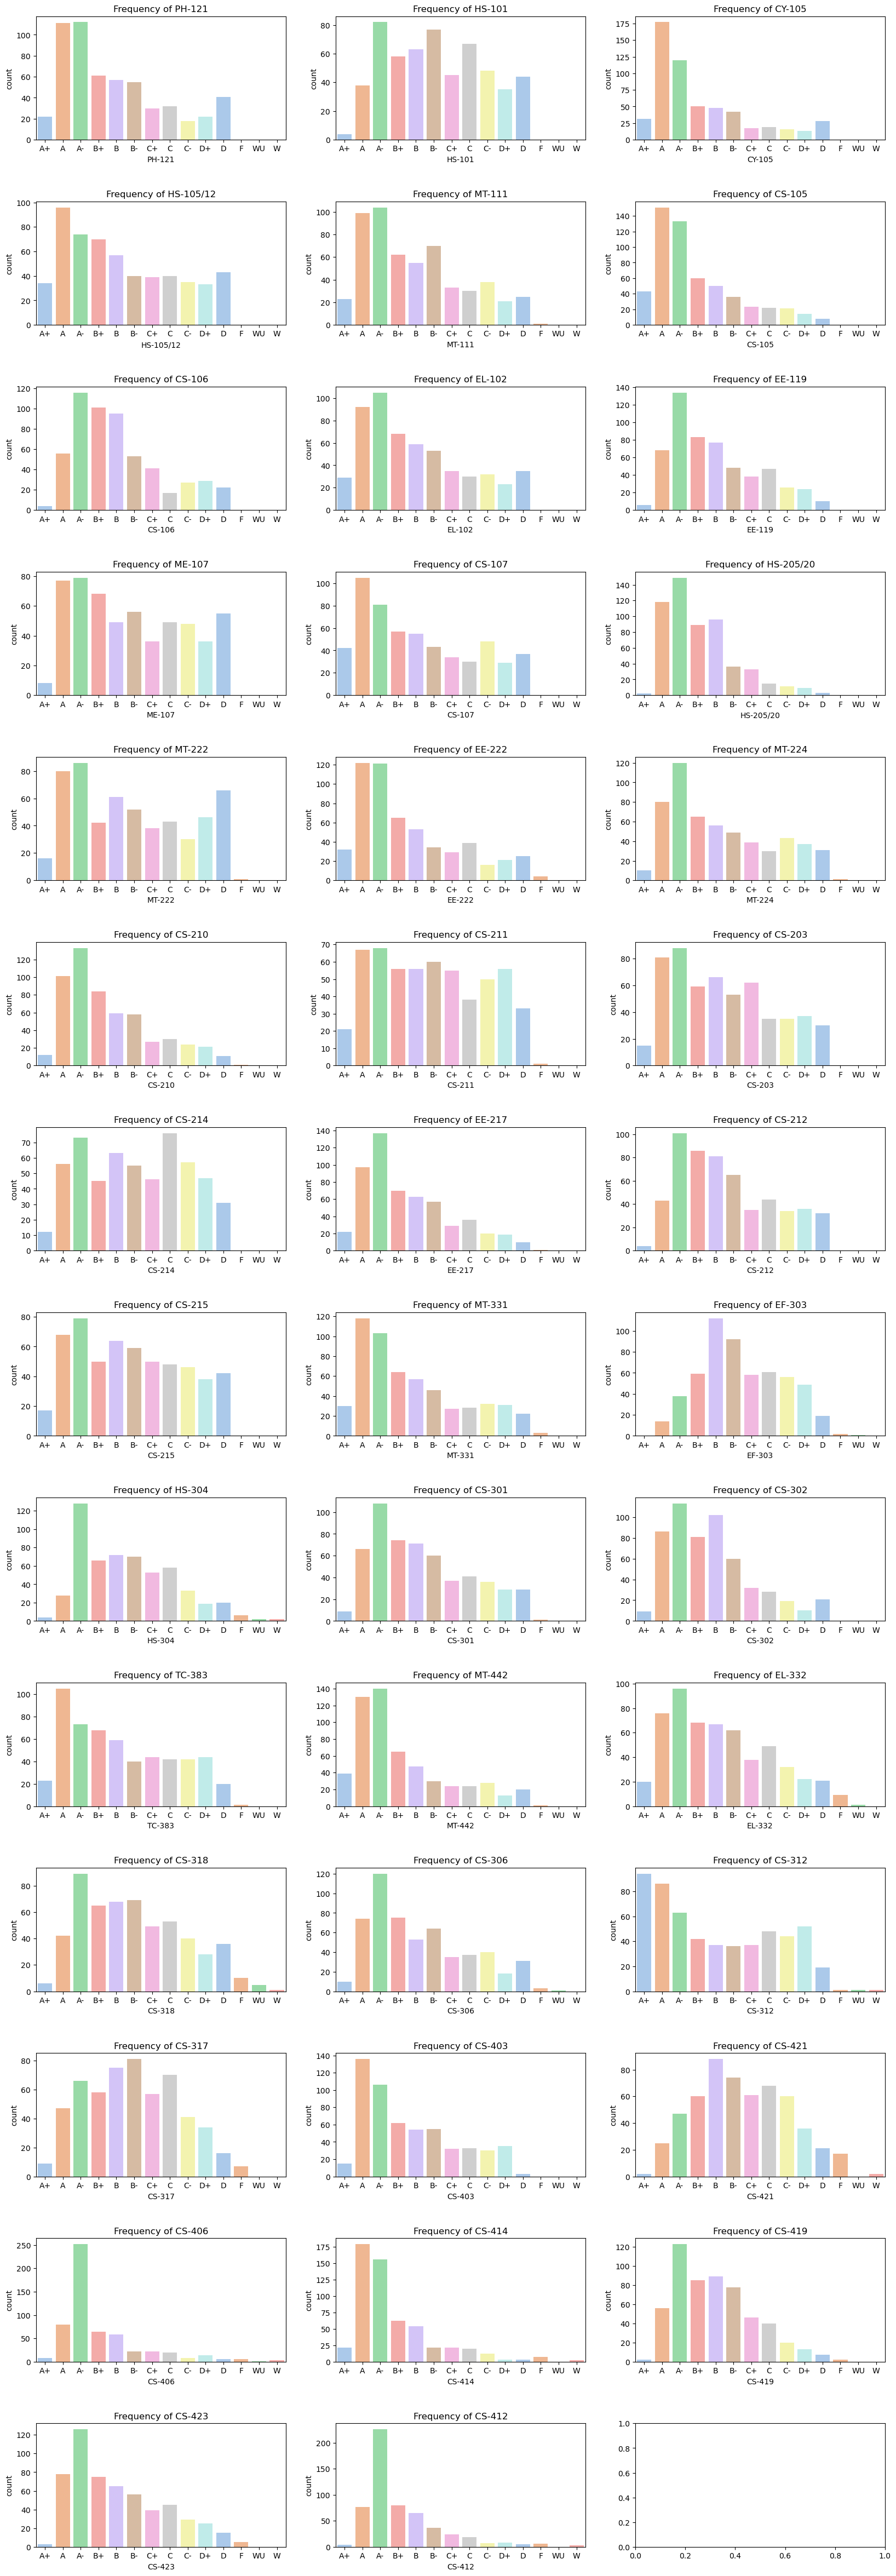

In [28]:
# Visualize the categorical variables
fig, axs = plt.subplots(14, 3, figsize=(20, 60))

for ax, column in zip(axs.flat, categorical_col):
    sns.countplot(data=df, x=column, ax=ax, palette='pastel')
    ax.set_title(f"Frequency of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In most features we can notice that there is a trend for A and A- grades.
We can notice that grades lower than D are few.
Although each variable has its own distribution, there are similar characteristics.

# Bivariate Analysis

In [29]:
categorical_col.sort_values()

Index(['CS-105', 'CS-106', 'CS-107', 'CS-203', 'CS-210', 'CS-211', 'CS-212',
       'CS-214', 'CS-215', 'CS-301', 'CS-302', 'CS-306', 'CS-312', 'CS-317',
       'CS-318', 'CS-403', 'CS-406', 'CS-412', 'CS-414', 'CS-419', 'CS-421',
       'CS-423', 'CY-105', 'EE-119', 'EE-217', 'EE-222', 'EF-303', 'EL-102',
       'EL-332', 'HS-101', 'HS-105/12', 'HS-205/20', 'HS-304', 'ME-107',
       'MT-111', 'MT-222', 'MT-224', 'MT-331', 'MT-442', 'PH-121', 'TC-383'],
      dtype='object')

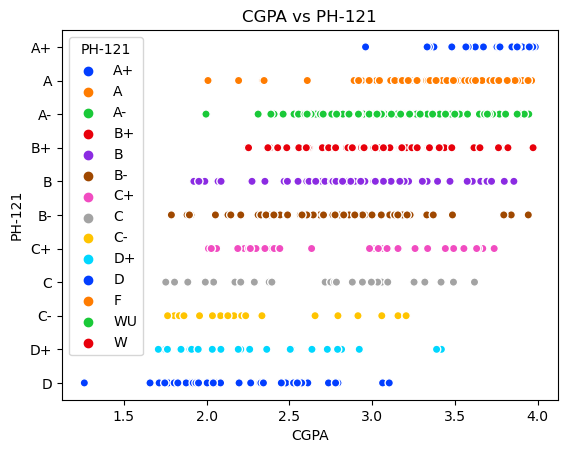

In [30]:
col = categorical_col[0]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

We can see that those with higher grades tend to have a higher CGPA value. For example, if we analyze the group of students with A+ in this subject, we see that the majority have a CGPA between 3.2 and 4 while those who obtained D, their CGPA ranging from 1.6 to 2.8 with a couple of exceptions greater than 3.

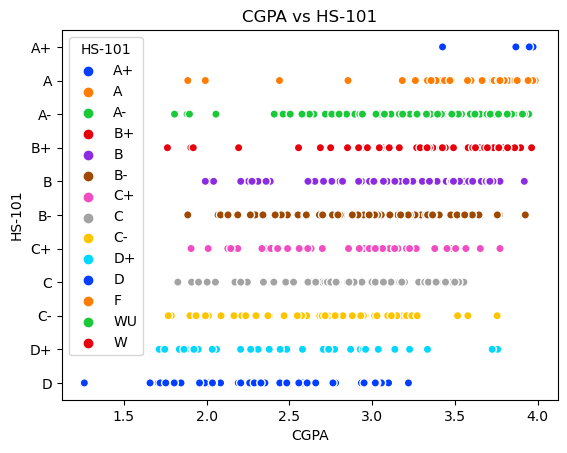

In [31]:
col = categorical_col[1]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

HS-101 seems to be a History or Social Studies course. The pattern remains: students with a grade of D tend to have a lower CGPA than those with a grade higher than A.

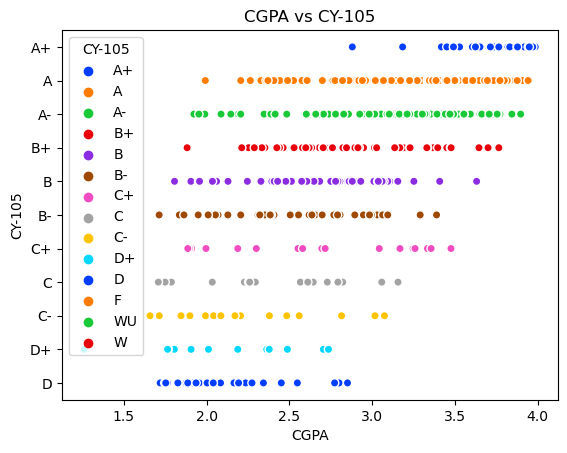

In [32]:
col = categorical_col[2]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

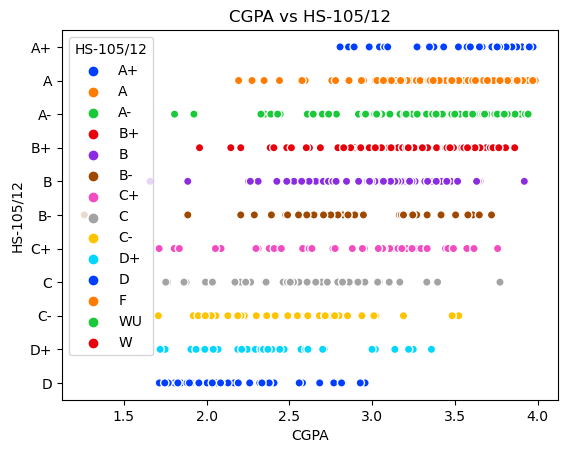

In [33]:
col = categorical_col[3]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

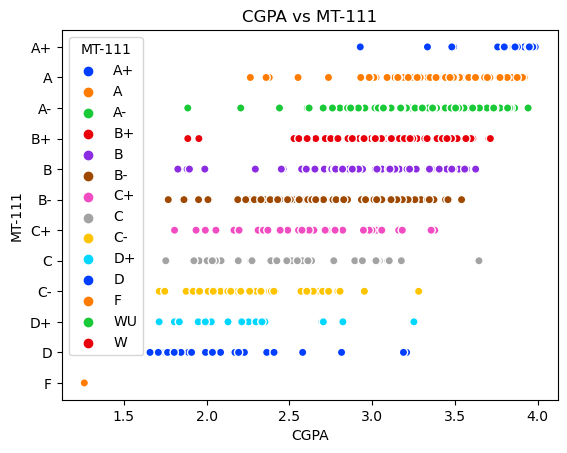

In [34]:
col = categorical_col[4]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

In this subject there is an F, however in most subjects the minimum grade is D

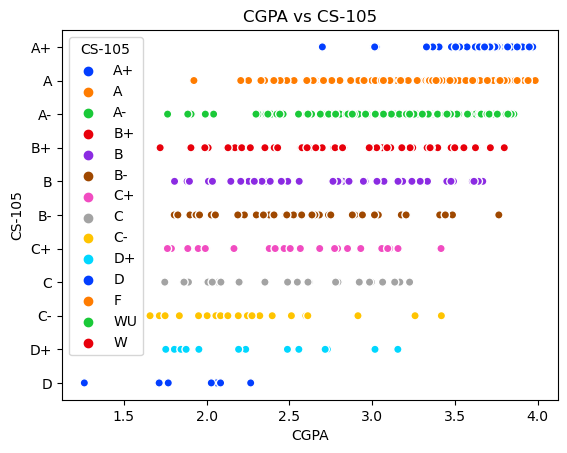

In [35]:
col = categorical_col[5]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

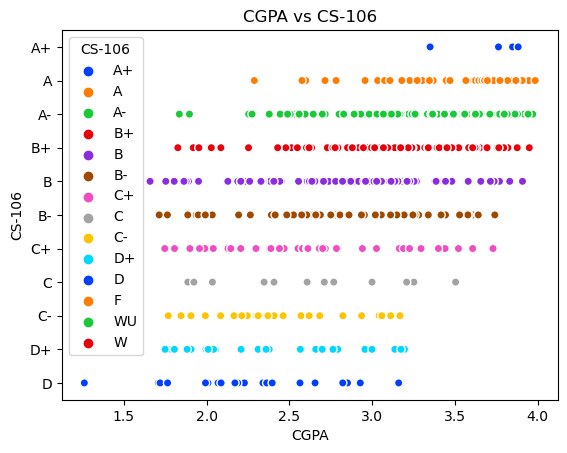

In [36]:
col = categorical_col[6]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

Below are the plots corresponding to the remaining features:

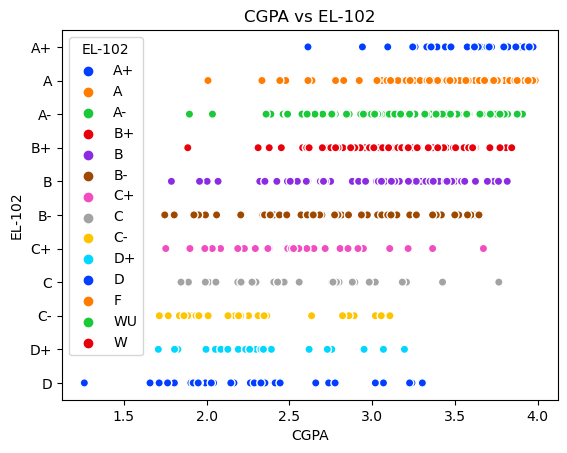

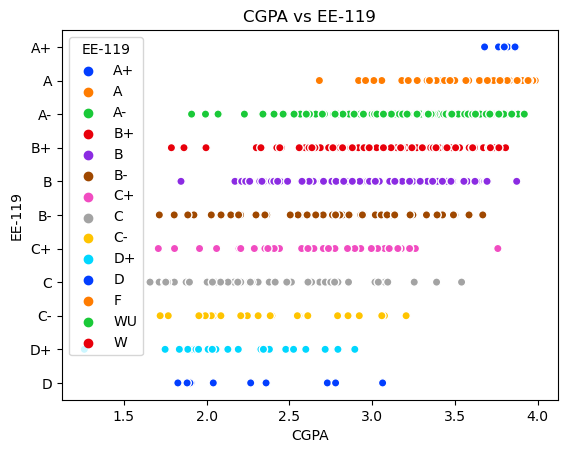

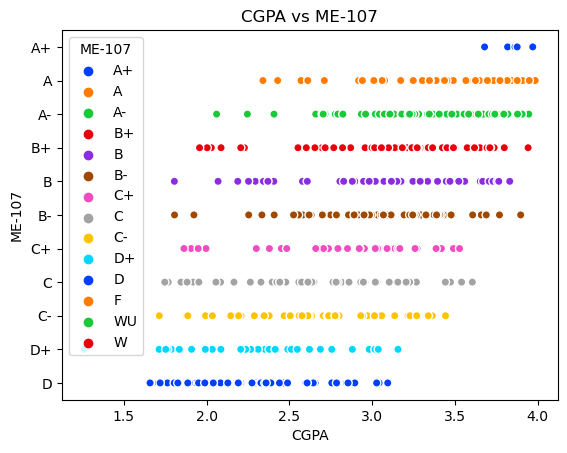

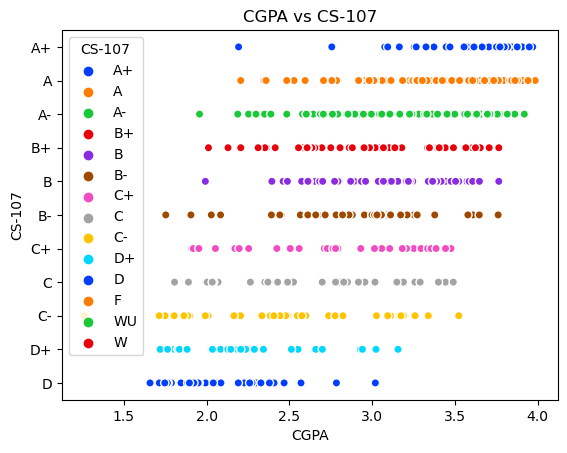

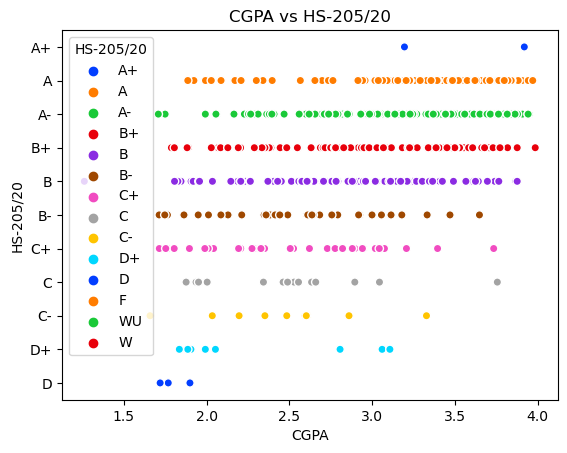

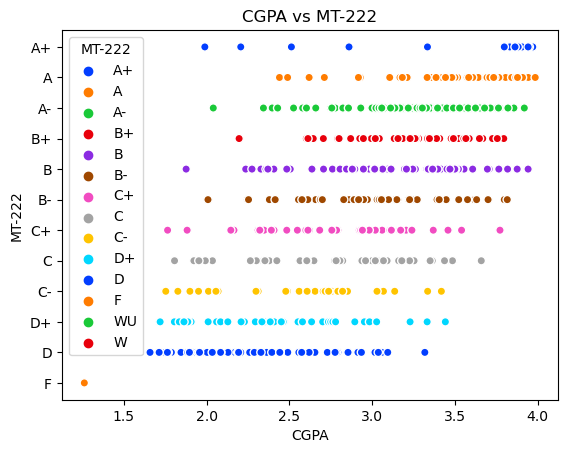

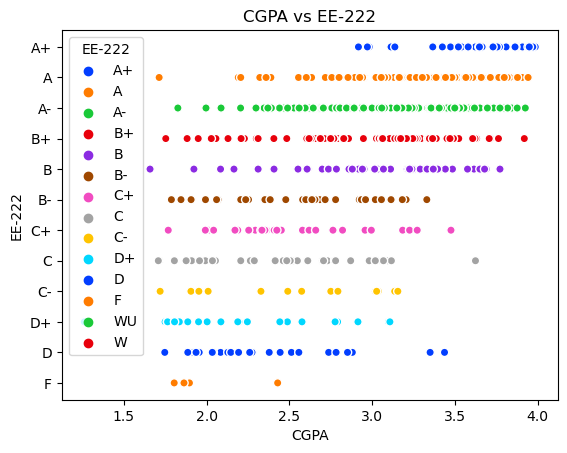

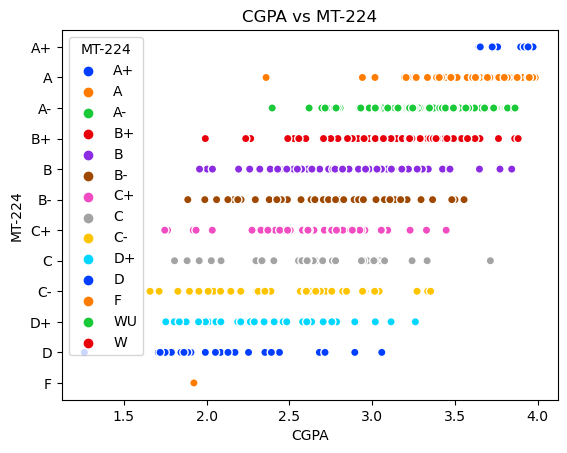

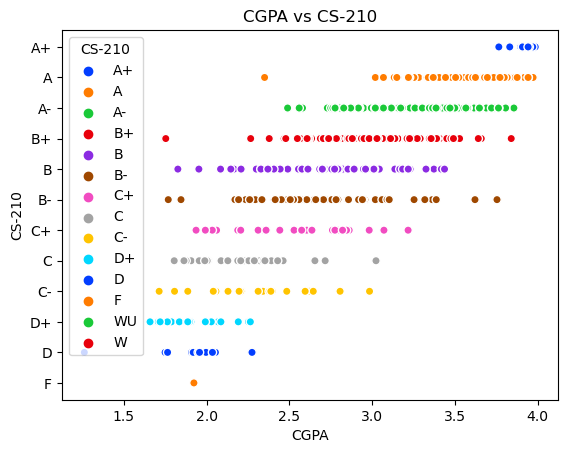

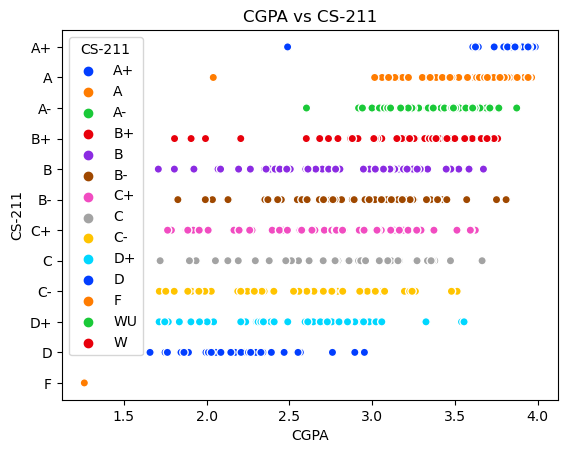

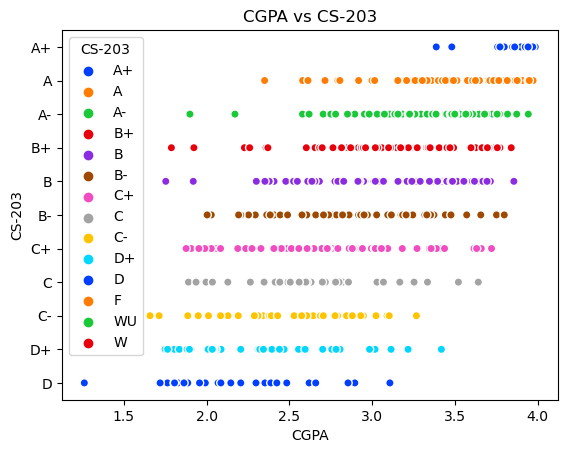

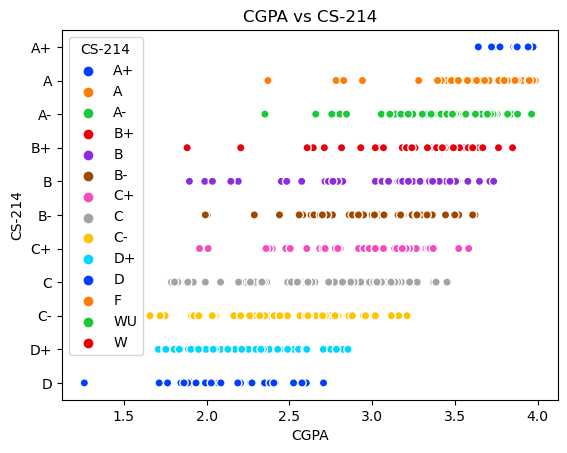

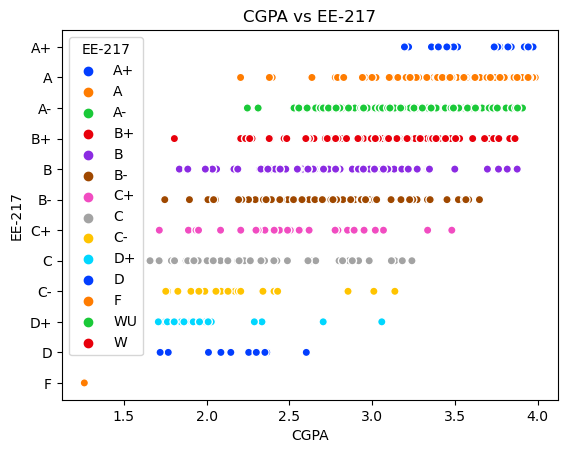

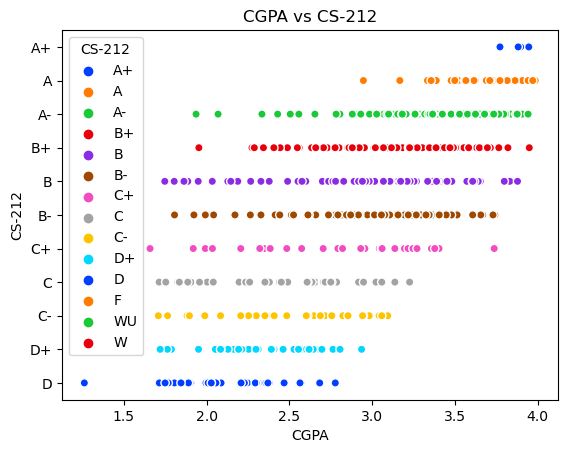

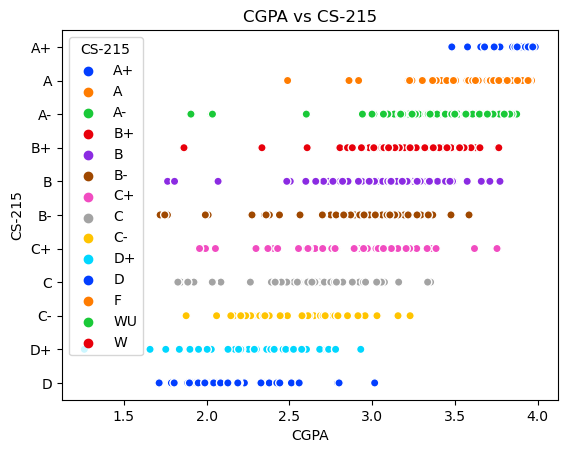

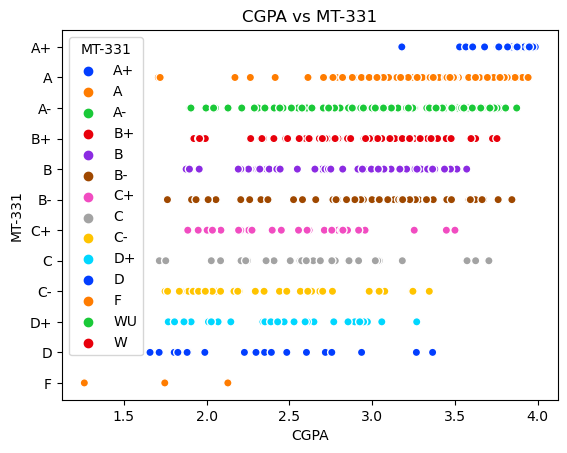

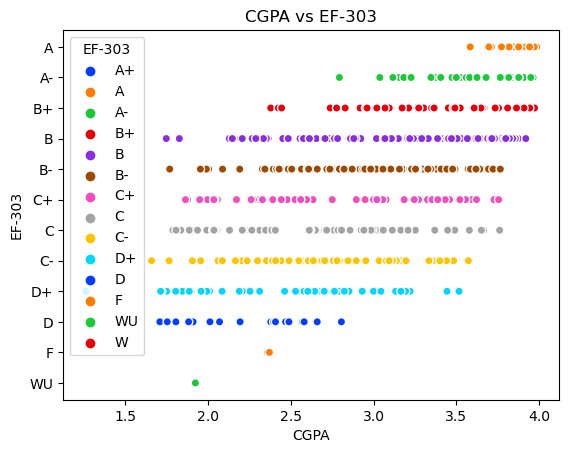

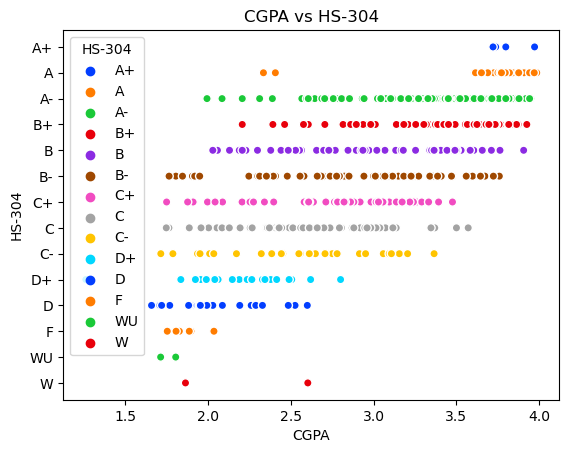

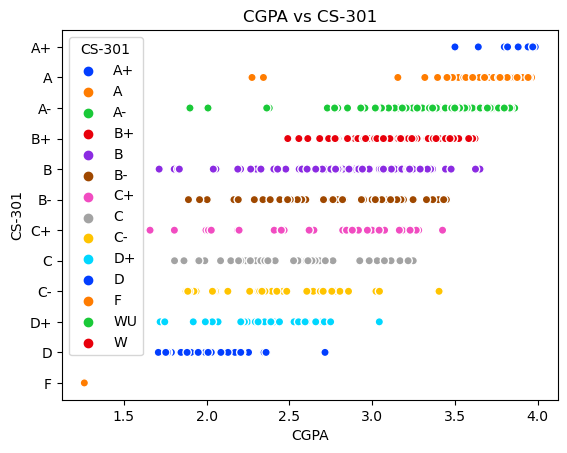

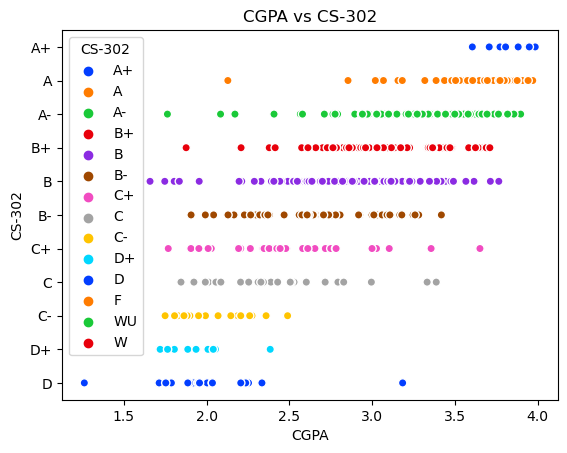

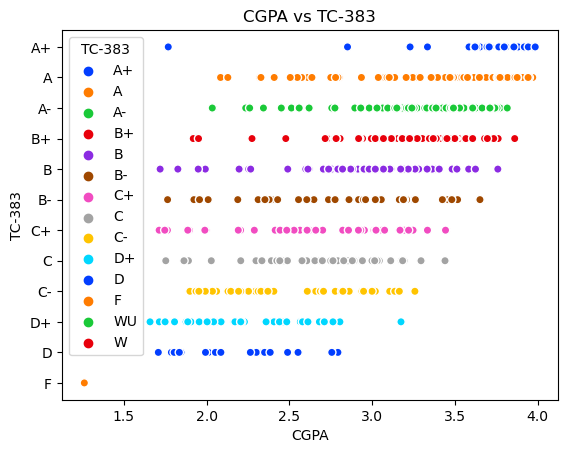

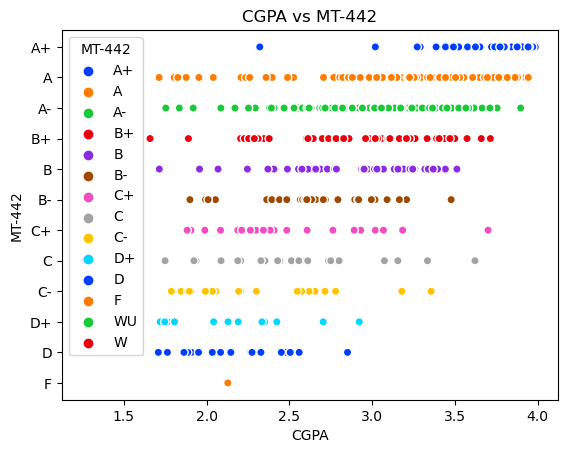

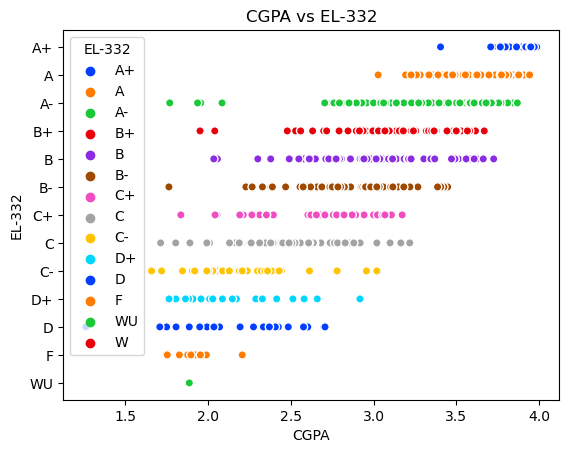

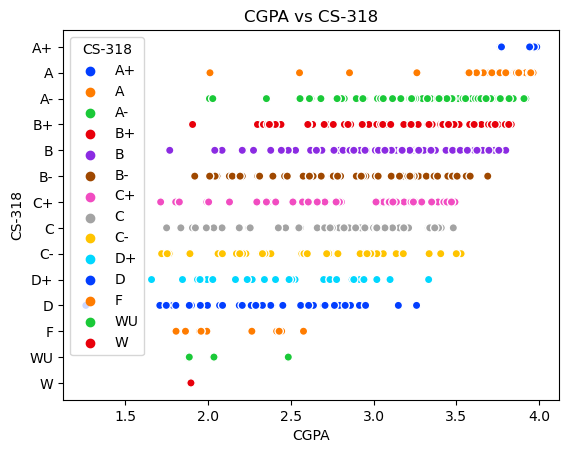

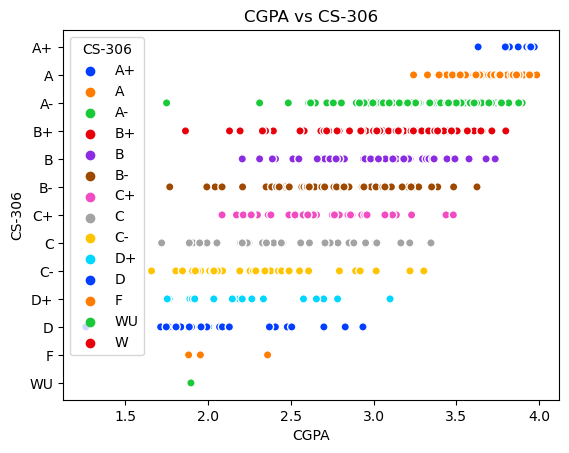

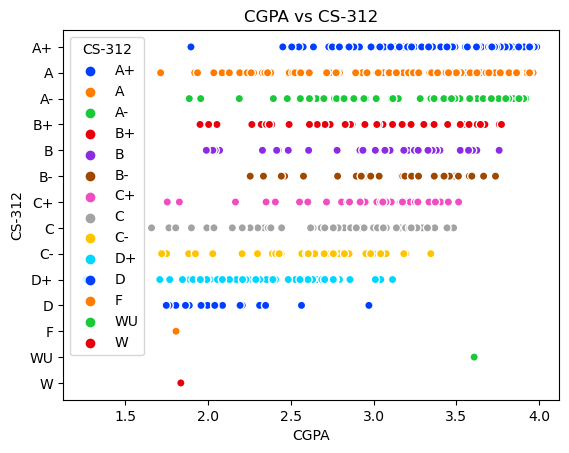

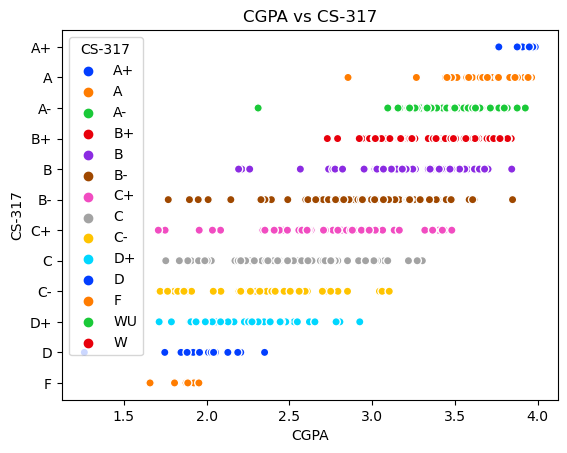

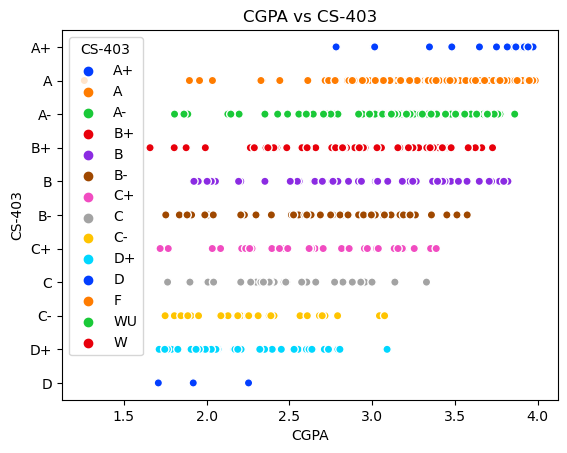

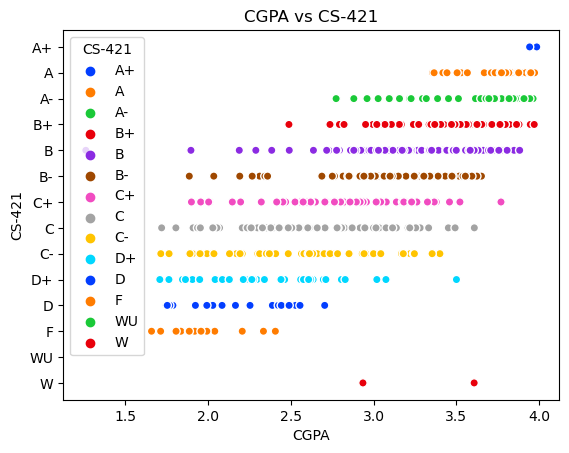

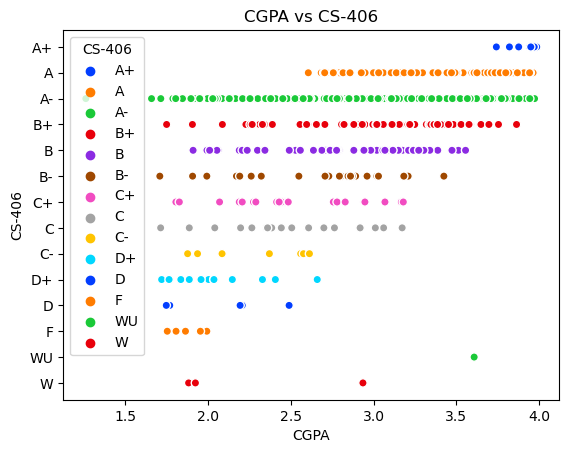

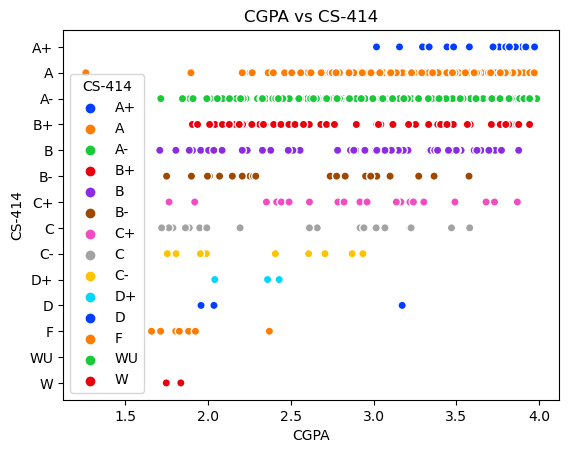

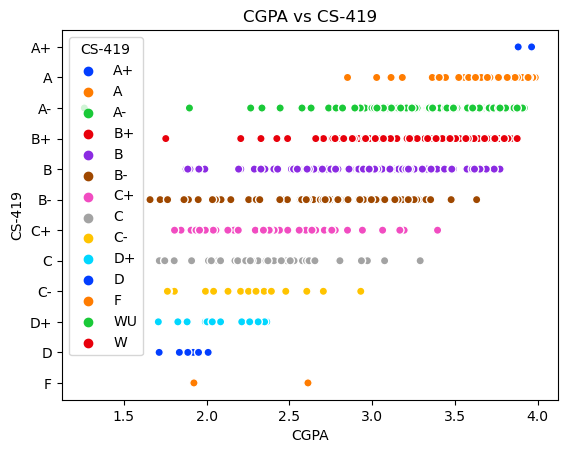

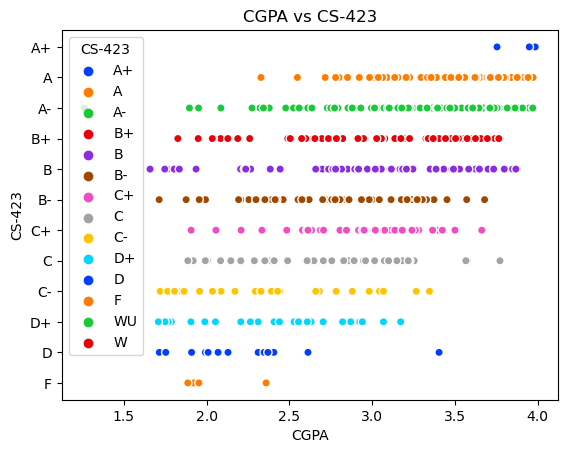

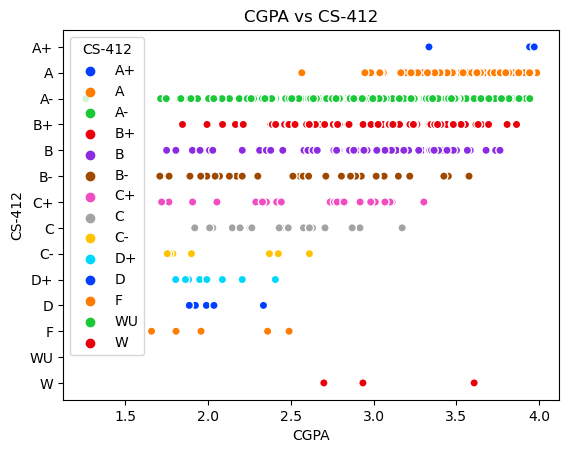

In [37]:
for col in categorical_col[7:]:
    sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
    plt.ylabel(f"{col}")
    plt.title(f"CGPA vs {col}")
    plt.show()

# Multivariate Analysis

# Encoding categorical columns

In order to make the multivariate Analysis we need to encode the categorical features, for this purpose, we will use OrdinalEncoder.

In [38]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in categorical_col:
    df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))

df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       5.0    10.0     8.0        6.0     8.0    10.0     9.0     8.0   
1       0.0     9.0    10.0        9.0     5.0     6.0     9.0     0.0   
2       0.0     3.0     0.0        5.0     4.0     0.0     5.0     4.0   
3       9.0     7.0    10.0        9.0     9.0     2.0    10.0     8.0   
4       2.0     2.0     2.0        4.0     0.0     0.0     2.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566     3.0     0.0     0.0        2.0     1.0     0.0     2.0     2.0   
567     1.0     0.0     0.0        0.0     0.0     0.0     0.0     2.0   
568     3.0     0.0     2.0        4.0     0.0     0.0     0.0     0.0   
569     0.0     4.0     9.0        0.0     9.0    10.0     5.0     8.0   
570     6.0     9.0     9.0        6.0     6.0    10.0     3.0     7.0   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       5.0     8.0  ...     8.0     8.0     8.0     8.0     2.0     0.0   
1      10.0     9.0  ...    10.0     9.0     6.0     9.0     2.0     5.0   
2       2.0     2.0  ...     3.0     3.0     0.0     6.0     0.0     0.0   
3       9.0     7.0  ...    10.0     6.0    10.0     8.0     5.0     3.0   
4       0.0     2.0  ...     5.0     4.0     4.0     5.0     2.0     0.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566     1.0     4.0  ...     2.0     2.0     0.0     0.0     0.0     4.0   
567     0.0     0.0  ...     4.0     4.0     0.0     0.0     2.0     3.0   
568     0.0     3.0  ...     2.0     3.0     0.0     4.0     0.0     6.0   
569     5.0     8.0  ...     9.0     3.0     3.0     8.0     9.0     6.0   
570     6.0    10.0  ...     7.0     6.0     5.0     9.0    11.0     8.0   

     CS-419  CS-423  CS-412   CGPA  
0       8.0     3.0     2.0  2.205  
1       6.0     6.0     3.0  2.008  
2       0.0     2.0     0.0  3.608  
3       7.0     7.0     7.0  1.906  
4       2.0     2.0     0.0  3.448  
..      ...     ...     ...    ...  
566     4.0     3.0     0.0  3.798  
567     2.0     6.0     2.0  3.772  
568     4.0     2.0     2.0  3.470  
569     3.0     5.0     6.0  2.193  
570     4.0     9.0     8.0  1.753  

[561 rows x 42 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     561 non-null    float64
 1   HS-101     561 non-null    float64
 2   CY-105     561 non-null    float64
 3   HS-105/12  561 non-null    float64
 4   MT-111     561 non-null    float64
 5   CS-105     561 non-null    float64
 6   CS-106     561 non-null    float64
 7   EL-102     561 non-null    float64
 8   EE-119     561 non-null    float64
 9   ME-107     561 non-null    float64
 10  CS-107     561 non-null    float64
 11  HS-205/20  561 non-null    float64
 12  MT-222     561 non-null    float64
 13  EE-222     561 non-null    float64
 14  MT-224     561 non-null    float64
 15  CS-210     561 non-null    float64
 16  CS-211     561 non-null    float64
 17  CS-203     561 non-null    float64
 18  CS-214     561 non-null    float64
 19  EE-217     561 non-null    float64
 20  CS-212     561 

In [40]:
# Statistical summary of numerical
df.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  561.000000  561.000000  561.000000  561.000000  561.000000  561.000000   
mean     3.691622    5.028520    2.795009    4.176471    3.841355    2.766488   
std      2.983182    2.777314    2.840846    3.148562    2.919418    2.639809   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    3.000000    0.000000    2.000000    2.000000    0.000000   
50%      3.000000    5.000000    2.000000    4.000000    3.000000    2.000000   
75%      6.000000    7.000000    4.000000    7.000000    6.000000    4.000000   
max     10.000000   10.000000   10.000000   10.000000   11.000000   10.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  561.000000  561.000000  561.000000  561.000000  ...  561.000000   
mean     4.069519    3.884135    3.855615    4.723708  ...    4.108734   
std      2.674045    2.960293    2.622466    3.102469  ...    3.356861   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    1.000000   
50%      4.000000    3.000000    3.000000    4.000000  ...    4.000000   
75%      5.000000    6.000000    6.000000    7.000000  ...    7.000000   
max     10.000000   10.000000   10.000000   10.000000  ...   13.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  561.000000  561.000000  561.000000  561.000000  561.000000  561.000000   
mean     4.832442    3.477718    5.427807    3.001783    2.440285    3.889483   
std      2.764652    2.965869    2.734478    2.486750    2.500803    2.390886   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.000000    1.000000    3.000000    2.000000    0.000000    2.000000   
50%      5.000000    3.000000    5.000000    2.000000    2.000000    4.000000   
75%      7.000000    5.000000    7.000000    4.000000    4.000000    5.000000   
max     11.000000   10.000000   12.000000   13.000000   12.000000   11.000000   

           CS-423      CS-412        CGPA  
count  561.000000  561.000000  561.000000  
mean     4.001783    3.067736    2.977501  
std      2.807833    2.348794    0.594160  
min      0.000000    0.000000    1.261000  
25%      2.000000    2.000000    2.564000  
50%      4.000000    2.000000    3.042000  
75%      6.000000    4.000000    3.458000  
max     11.000000   12.000000    3.985000  

[8 rows x 42 columns]

After encoding the categorical columns we can see all columns details here. The counts of all the columns are same that means no null values in the dataset. This describe method describe the count, mean, st, min, IQR and max values of all the columns.

In [41]:
# Calculate the correlation between features
cor = df.corr()
cor

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.364662  0.542480   0.489461  0.457760  0.590384   
HS-101     0.364662  1.000000  0.318734   0.466245  0.429801  0.383307   
CY-105     0.542480  0.318734  1.000000   0.478800  0.519495  0.568184   
HS-105/12  0.489461  0.466245  0.478800   1.000000  0.475902  0.474835   
MT-111     0.457760  0.429801  0.519495   0.475902  1.000000  0.381212   
CS-105     0.590384  0.383307  0.568184   0.474835  0.381212  1.000000   
CS-106     0.278479  0.307744  0.349782   0.485935  0.491839  0.276018   
EL-102     0.408450  0.345745  0.421849   0.341497  0.543150  0.345009   
EE-119     0.580460  0.303358  0.484034   0.409673  0.403776  0.498891   
ME-107     0.526575  0.327945  0.462803   0.312481  0.462213  0.440830   
CS-107     0.471586  0.502361  0.451199   0.526392  0.468792  0.507680   
HS-205/20  0.289300  0.175735  0.238308   0.165138  0.316970  0.176427   
MT-222     0.562491  0.397886  0.488865   0.461679  0.499918  0.481531   
EE-222     0.551562  0.389994  0.423165   0.390964  0.401936  0.509679   
MT-224     0.352519  0.267045  0.462872   0.400780  0.578365  0.262957   
CS-210     0.518775  0.320298  0.503007   0.465133  0.582871  0.444559   
CS-211     0.330758  0.341461  0.457750   0.351412  0.559808  0.341297   
CS-203     0.467551  0.263625  0.392086   0.286507  0.515142  0.409914   
CS-214     0.410076  0.460450  0.456118   0.405390  0.586454  0.406419   
EE-217     0.427052  0.332679  0.388839   0.347970  0.520679  0.338811   
CS-212     0.355068  0.341184  0.436052   0.465238  0.575886  0.321446   
CS-215     0.493052  0.403469  0.532072   0.462283  0.586355  0.460635   
MT-331     0.224737  0.192493  0.419632   0.285221  0.479254  0.269991   
EF-303     0.233253  0.260642  0.390858   0.417683  0.446447  0.231212   
HS-304     0.465856  0.441408  0.378287   0.376659  0.346363  0.500632   
CS-301     0.335601  0.331199  0.418990   0.445205  0.574229  0.260676   
CS-302     0.482036  0.360221  0.509041   0.444393  0.537211  0.458363   
TC-383     0.237547  0.349655  0.369312   0.441173  0.542332  0.260645   
MT-442     0.469691  0.235440  0.467895   0.337331  0.425729  0.431416   
EL-332     0.455202  0.394341  0.391191   0.374887  0.607271  0.391187   
CS-318     0.487258  0.425836  0.367128   0.400547  0.408317  0.486345   
CS-306     0.510454  0.449423  0.403120   0.510591  0.508714  0.451801   
CS-312     0.065410  0.228937  0.298765   0.283881  0.509412  0.083275   
CS-317     0.476340  0.367613  0.494913   0.489800  0.572161  0.397862   
CS-403     0.368667  0.250034  0.525173   0.486041  0.455681  0.319673   
CS-421     0.327924  0.321463  0.403245   0.447928  0.548722  0.269655   
CS-406     0.301207  0.275355  0.151716   0.181047  0.318325  0.256310   
CS-414     0.187699  0.245779  0.044900   0.167917  0.256619  0.153554   
CS-419     0.503203  0.301938  0.484092   0.496238  0.536780  0.339665   
CS-423     0.119664  0.242951  0.153844   0.256895  0.429186  0.066309   
CS-412     0.316964  0.236217  0.085047   0.166924  0.287769  0.198109   
CGPA      -0.642891 -0.525553 -0.647309  -0.614840 -0.744468 -0.583631   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.278479  0.408450  0.580460  0.526575  ...  0.065410  0.476340   
HS-101     0.307744  0.345745  0.303358  0.327945  ...  0.228937  0.367613   
CY-105     0.349782  0.421849  0.484034  0.462803  ...  0.298765  0.494913   
HS-105/12  0.485935  0.341497  0.409673  0.312481  ...  0.283881  0.489800   
MT-111     0.491839  0.543150  0.403776  0.462213  ...  0.509412  0.572161   
CS-105     0.276018  0.345009  0.498891  0.440830  ...  0.083275  0.397862   
CS-106     1.000000  0.316386  0.286380  0.286875  ...  0.489331  0.427427   
EL-102     0.316386  1.000000  0.454893  0.460814  ...  0.338204  0.480480   
EE-119     0.286380  0.454893  1.000000  0.560468  ...  0.176641  0.454772   
ME-107     0.286875  0.460814  0.560468  1.000000 

In [42]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'CGPA')]

Feature A  Feature B  Corr coef
41        CGPA       CGPA   1.000000
1682      CGPA     CS-414  -0.445195
1685      CGPA  HS-205/20  -0.464272
1687      CGPA     CS-412  -0.509788
1689      CGPA     CS-312  -0.515231
1690      CGPA     CS-406  -0.515967
1693      CGPA     HS-101  -0.525553
1695      CGPA     CS-106  -0.541780
1696      CGPA     EF-303  -0.553021
1699      CGPA     CS-423  -0.578569
1701      CGPA     MT-331  -0.580357
1702      CGPA     CS-105  -0.583631
1704      CGPA  HS-105/12  -0.614840
1707      CGPA     EE-222  -0.617972
1708      CGPA     CS-403  -0.618561
1710      CGPA     CS-107  -0.628063
1712      CGPA     HS-304  -0.629328
1714      CGPA     MT-442  -0.629403
1716      CGPA     CS-318  -0.633704
1719      CGPA     PH-121  -0.642891
1720      CGPA     CY-105  -0.647309
1723      CGPA     EE-119  -0.650335
1725      CGPA     EL-102  -0.652520
1726      CGPA     CS-211  -0.653155
1729      CGPA     ME-107  -0.661765
1731      CGPA     TC-383  -0.662460
1732      CGPA     CS-203  -0.665671
1734      CGPA     CS-212  -0.670338
1736      CGPA     MT-222  -0.680938
1739      CGPA     EE-217  -0.684938
1740      CGPA     CS-421  -0.705442
1742      CGPA     CS-419  -0.710096
1744      CGPA     MT-224  -0.733665
1746      CGPA     CS-301  -0.733819
1748      CGPA     MT-111  -0.744468
1750      CGPA     CS-214  -0.750184
1753      CGPA     CS-302  -0.759602
1754      CGPA     CS-215  -0.761122
1757      CGPA     CS-306  -0.774143
1758      CGPA     EL-332  -0.795902
1760      CGPA     CS-210  -0.796970
1762      CGPA     CS-317  -0.799364

Here is the list of the correlation coefficients with the target variable. We confirm the negative relation between the features and the label and the majority of features have an impact on the target variable, the most predominant being CS-317 with -0.799 and the one with the lowest incidence being CS-414 with -0.445.

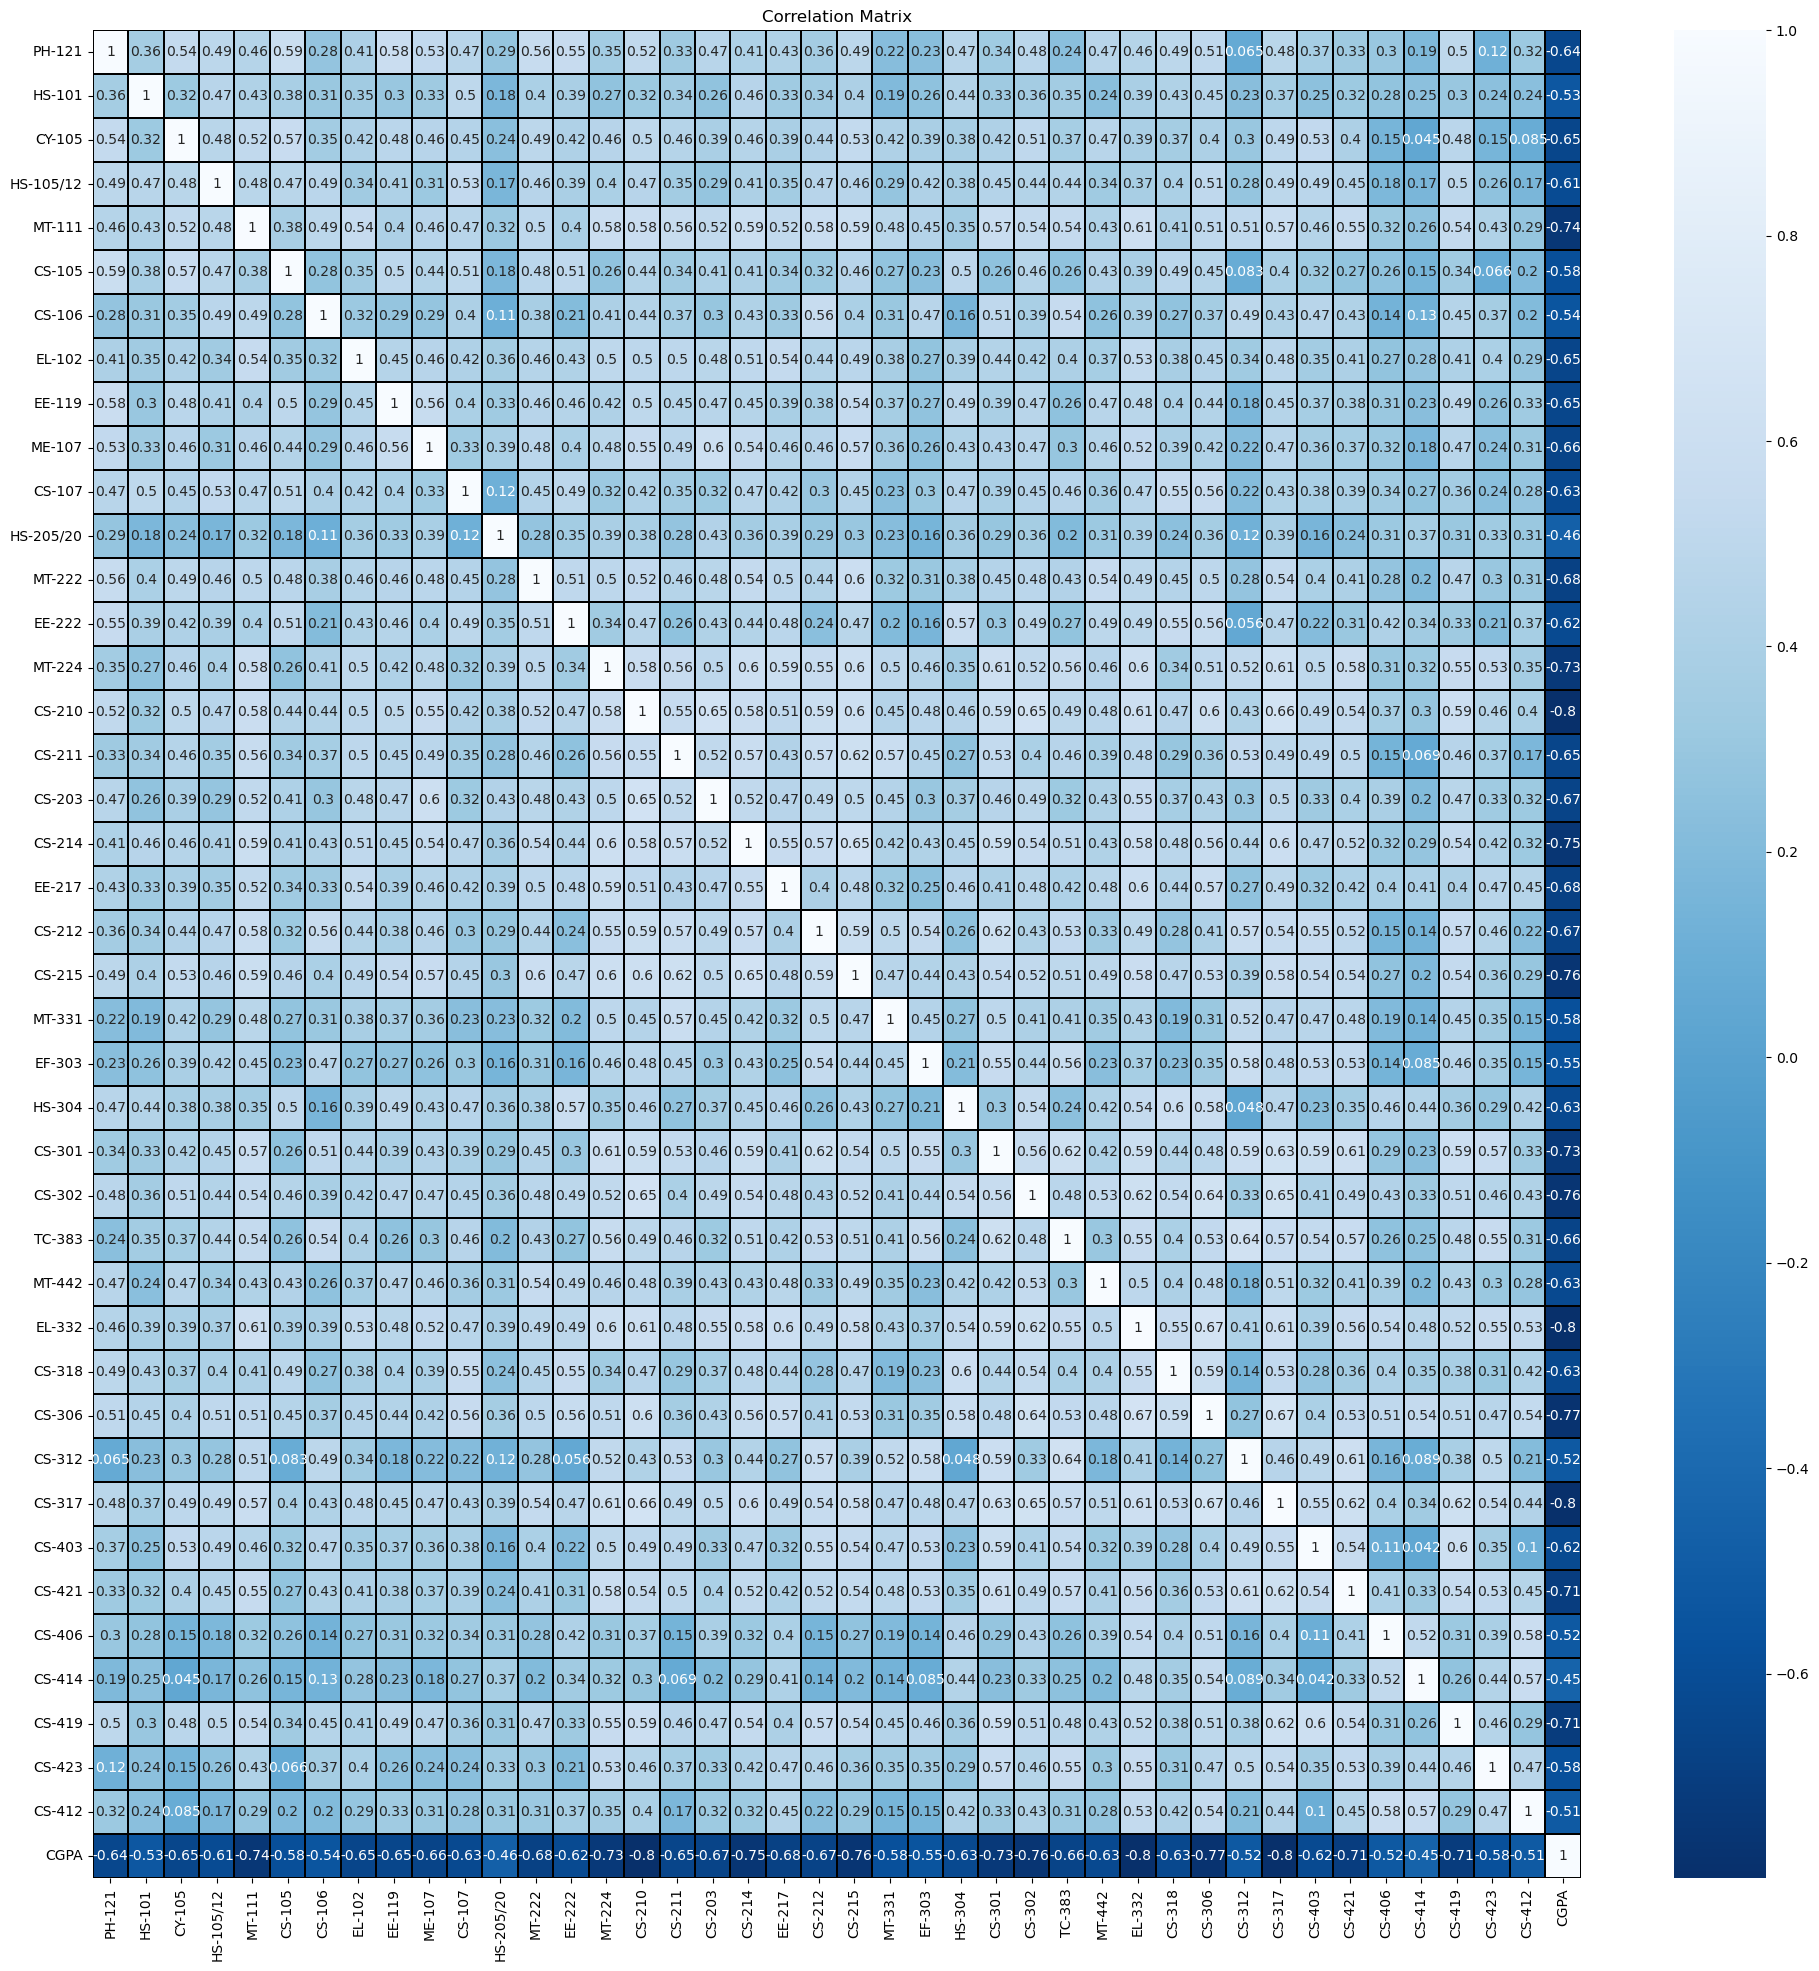

In [43]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2g", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation matrix. We can observe the relation between feature to feature and feature to label.

1) This heatmap contains both positive and negative correlation.
2) The target has more correlation with CS-317(-0.8), CS-210(-0.8), and EL-332(-0.8), and is negatively correlated with all the features being the mino with CS-414(-0.45)

In [44]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] != corr_df['Feature B'] )].head(10)

Feature A Feature B  Corr coef
42    CS-317    CS-306   0.673274
43    CS-306    CS-317   0.673274
44    CS-306    EL-332   0.665169
45    EL-332    CS-306   0.665169
46    CS-317    CS-210   0.657846
47    CS-210    CS-317   0.657846
48    CS-210    CS-203   0.652431
49    CS-203    CS-210   0.652431
50    CS-302    CS-210   0.650908
51    CS-210    CS-302   0.650908

These are the 10 highest positive correlations between features.

In [45]:
corr_df[(corr_df['Feature A'] != corr_df['Feature B'] )].tail(10)

Feature A Feature B  Corr coef
1754      CGPA    CS-215  -0.761122
1755    CS-215      CGPA  -0.761122
1756    CS-306      CGPA  -0.774143
1757      CGPA    CS-306  -0.774143
1758      CGPA    EL-332  -0.795902
1759    EL-332      CGPA  -0.795902
1760      CGPA    CS-210  -0.796970
1761    CS-210      CGPA  -0.796970
1762      CGPA    CS-317  -0.799364
1763    CS-317      CGPA  -0.799364

In [46]:
df.isnull().sum().sum()

0

# Removing Outliers

In [47]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.438976  1.791629  1.833833   0.579679  1.425749  2.742611  1.845475   
1    1.238582  1.431248  2.538477   1.533346  0.397230  1.225997  1.845475   
2    1.238582  0.731041  0.984743   0.261791  0.054390  1.048924  0.348278   
3    1.781023  0.710485  2.538477   1.533346  1.768589  0.290617  2.219774   
4    0.567559  1.091423  0.280099   0.056098  1.316969  1.048924  0.774619   
..        ...       ...       ...        ...       ...       ...       ...   
566  0.232047  1.812186  0.984743   0.691875  0.974129  1.048924  0.774619   
567  0.903071  1.812186  0.984743   1.327653  1.316969  1.048924  1.523217   
568  0.232047  1.812186  0.280099   0.056098  1.316969  1.048924  1.523217   
569  1.238582  0.370660  2.186155   1.327653  1.768589  2.742611  0.348278   
570  0.774488  1.431248  2.186155   0.579679  0.740069  2.742611  0.400320   

       EL-102    EE-119    ME-107  ...    CS-312    CS-317    CS-403  \
0    1.391598  0.436767  1.056970  ...  1.160232  1.146757  1.526135   
1    1.313249  2.345071  1.379582  ...  1.756559  1.508789  0.851195   
2    0.039174  0.708215  0.878700  ...  0.330584  0.663403  1.173626   
3    1.391598  1.963410  0.734358  ...  1.756559  0.422693  2.201076   
4    0.039174  1.471537  0.878700  ...  0.265743  0.301371  0.176255   
..        ...       ...       ...  ...       ...       ...       ...   
566  0.637037  1.089876  0.233477  ...  0.628747  1.025434  1.173626   
567  0.637037  1.471537  1.523923  ...  0.032421  0.301371  1.173626   
568  1.313249  1.471537  0.556088  ...  0.628747  0.663403  1.173626   
569  1.391598  0.436767  1.056970  ...  1.458396  0.663403  0.161216   
570  1.053492  0.818428  1.702193  ...  0.862069  0.422693  0.513725   

       CS-421    CS-406    CS-414    CS-419    CS-423    CS-412      CGPA  
0    0.941492  0.403208  0.976671  1.720779  0.357100  0.454995  1.301316  
1    1.307519  0.403208  1.024471  0.883522  0.712293  0.028864  1.633172  
2    0.209438  1.208188  0.976671  1.628248  0.713564  1.307256  1.062107  
3    0.941492  0.804263  0.224014  1.302150  1.068758  1.675657  1.804996  
4    0.156589  0.403208  0.976671  0.790991  0.713564  1.307256  0.792579  
..        ...       ...       ...       ...       ...       ...       ...  
566  1.986724  1.208188  0.624242  0.046266  0.357100  1.307256  1.382171  
567  1.986724  0.403208  0.224014  0.790991  0.712293  0.454995  1.338373  
568  0.522616  1.208188  1.424699  0.046266  0.713564  0.454995  0.829639  
569  0.941492  2.414224  1.424699  0.372363  0.355829  1.249527  1.321530  
570  1.307519  3.219204  2.225156  0.046266  1.781687  2.101788  2.062732  

[561 rows x 42 columns]

In [48]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df

31 rows with outliers were deleted.
This represent 5.53% of the data.
In the new dataset there are 530 rows and 42 columns.


PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       5.0    10.0     8.0        6.0     8.0    10.0     9.0     8.0   
1       0.0     9.0    10.0        9.0     5.0     6.0     9.0     0.0   
2       0.0     3.0     0.0        5.0     4.0     0.0     5.0     4.0   
3       9.0     7.0    10.0        9.0     9.0     2.0    10.0     8.0   
4       2.0     2.0     2.0        4.0     0.0     0.0     2.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
564     2.0     9.0     0.0        6.0     4.0     4.0     6.0     2.0   
566     3.0     0.0     0.0        2.0     1.0     0.0     2.0     2.0   
567     1.0     0.0     0.0        0.0     0.0     0.0     0.0     2.0   
568     3.0     0.0     2.0        4.0     0.0     0.0     0.0     0.0   
569     0.0     4.0     9.0        0.0     9.0    10.0     5.0     8.0   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       5.0     8.0  ...     8.0     8.0     8.0     8.0     2.0     0.0   
1      10.0     9.0  ...    10.0     9.0     6.0     9.0     2.0     5.0   
2       2.0     2.0  ...     3.0     3.0     0.0     6.0     0.0     0.0   
3       9.0     7.0  ...    10.0     6.0    10.0     8.0     5.0     3.0   
4       0.0     2.0  ...     5.0     4.0     4.0     5.0     2.0     0.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
564     5.0     9.0  ...     3.0     7.0     4.0    10.0     6.0     8.0   
566     1.0     4.0  ...     2.0     2.0     0.0     0.0     0.0     4.0   
567     0.0     0.0  ...     4.0     4.0     0.0     0.0     2.0     3.0   
568     0.0     3.0  ...     2.0     3.0     0.0     4.0     0.0     6.0   
569     5.0     8.0  ...     9.0     3.0     3.0     8.0     9.0     6.0   

     CS-419  CS-423  CS-412   CGPA  
0       8.0     3.0     2.0  2.205  
1       6.0     6.0     3.0  2.008  
2       0.0     2.0     0.0  3.608  
3       7.0     7.0     7.0  1.906  
4       2.0     2.0     0.0  3.448  
..      ...     ...     ...    ...  
564     3.0     6.0     5.0  2.607  
566     4.0     3.0     0.0  3.798  
567     2.0     6.0     2.0  3.772  
568     4.0     2.0     2.0  3.470  
569     3.0     5.0     6.0  2.193  

[530 rows x 42 columns]

In [49]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
CS-406     1.367645
CS-105     0.991985
CY-105     0.980346
CS-412     0.885447
CS-414     0.884408
MT-442     0.884137
EE-222     0.762129
EE-217     0.742184
CS-210     0.670396
MT-331     0.656624
CS-106     0.646286
PH-121     0.620171
CS-403     0.610797
CS-302     0.609750
EE-119     0.593578
HS-205/20  0.577228
EL-102     0.540545
CS-423     0.490826
MT-111     0.485400
CS-419     0.455225
HS-304     0.454082
EL-332     0.452344
CS-107     0.442812
CS-312     0.442619
MT-224     0.440454
CS-306     0.436849
CS-301     0.424709
CS-212     0.419938
TC-383     0.363718
EF-303     0.350413
HS-105/12  0.346408
CS-318     0.341830
CS-203     0.293761
MT-222     0.210759
CS-317     0.154627
CS-215     0.154200
ME-107     0.125256
CS-211     0.095155
CS-421     0.094511
HS-101     0.089323
CS-214     0.039378
CGPA      -0.383135

We are going to select which features have a skew greater than 0.5 and apply transform methods to those features in order to eliminate the skewness

In [50]:
# Subsetting the features with a skew > 0.5
df_skew[df_skew['Skew'] > 0.5]

Skew
CS-406     1.367645
CS-105     0.991985
CY-105     0.980346
CS-412     0.885447
CS-414     0.884408
MT-442     0.884137
EE-222     0.762129
EE-217     0.742184
CS-210     0.670396
MT-331     0.656624
CS-106     0.646286
PH-121     0.620171
CS-403     0.610797
CS-302     0.609750
EE-119     0.593578
HS-205/20  0.577228
EL-102     0.540545

In [51]:
skew_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['CS-105',
 'CS-106',
 'CS-210',
 'CS-302',
 'CS-403',
 'CS-406',
 'CS-412',
 'CS-414',
 'CY-105',
 'EE-119',
 'EE-217',
 'EE-222',
 'EL-102',
 'HS-205/20',
 'MT-331',
 'MT-442',
 'PH-121']

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [52]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

We will select the best transformation method looking for the minimum absolute value of skewness

In [53]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^([A-Z]+-\d+)')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for PH-121
display(df_comp[df_comp['feature'] == 'PH-121'] )

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

index  Skewness feature  Skewness_abs
0  PH-121_sqrt -0.389763  PH-121      0.389763
1   PH-121_log       NaN  PH-121           NaN
2  PH-121_cbrt -0.855826  PH-121      0.855826
3       PH-121  0.620171  PH-121      0.620171

index  Skewness feature  Skewness_abs
64  CS-105_sqrt -0.112609  CS-105      0.112609
63       CS-106  0.646286  CS-106      0.646286
56  CS-210_sqrt -0.544472  CS-210      0.544472
55       CS-302  0.609750  CS-302      0.609750
48  CS-403_sqrt -0.345887  CS-403      0.345887
44  CS-406_sqrt -0.449531  CS-406      0.449531
40  CS-412_sqrt -0.720285  CS-412      0.720285
36  CS-414_sqrt -0.152758  CS-414      0.152758
32  CY-105_sqrt -0.010579  CY-105      0.010579
31       EE-119  0.593578  EE-119      0.593578
24  EE-217_sqrt -0.482591  EE-217      0.482591
20  EE-222_sqrt -0.287220  EE-222      0.287220
16  EL-102_sqrt -0.492778  EL-102      0.492778
15    HS-205/20  0.577228  HS-205      0.577228
8   MT-331_sqrt -0.334061  MT-331      0.334061
4   MT-442_sqrt -0.213888  MT-442      0.213888
0   PH-121_sqrt -0.389763  PH-121      0.389763

For each skewness column, we obtain the better transform method. We can observe that for columns "CS-106", "CS-302", "EE-119", and "HS-205/20" is better to no apply any transform method.

In [54]:
# Searching the columns to update with the transform data
sqrt_columns = low_skewness[low_skewness['index'] != low_skewness['feature']] 
display(sqrt_columns)

# Delete row for column 'Hs-205' which should not be transformed
sqrt_columns = sqrt_columns[sqrt_columns['feature'] != 'HS-205']

# Obtain the columns to tranform
sqrt_columns= sqrt_columns['feature'].to_list()
sqrt_columns

index  Skewness feature  Skewness_abs
64  CS-105_sqrt -0.112609  CS-105      0.112609
56  CS-210_sqrt -0.544472  CS-210      0.544472
48  CS-403_sqrt -0.345887  CS-403      0.345887
44  CS-406_sqrt -0.449531  CS-406      0.449531
40  CS-412_sqrt -0.720285  CS-412      0.720285
36  CS-414_sqrt -0.152758  CS-414      0.152758
32  CY-105_sqrt -0.010579  CY-105      0.010579
24  EE-217_sqrt -0.482591  EE-217      0.482591
20  EE-222_sqrt -0.287220  EE-222      0.287220
16  EL-102_sqrt -0.492778  EL-102      0.492778
15    HS-205/20  0.577228  HS-205      0.577228
8   MT-331_sqrt -0.334061  MT-331      0.334061
4   MT-442_sqrt -0.213888  MT-442      0.213888
0   PH-121_sqrt -0.389763  PH-121      0.389763

['CS-105',
 'CS-210',
 'CS-403',
 'CS-406',
 'CS-412',
 'CS-414',
 'CY-105',
 'EE-217',
 'EE-222',
 'EL-102',
 'MT-331',
 'MT-442',
 'PH-121']

In [55]:
sqrt_columns

['CS-105',
 'CS-210',
 'CS-403',
 'CS-406',
 'CS-412',
 'CS-414',
 'CY-105',
 'EE-217',
 'EE-222',
 'EL-102',
 'MT-331',
 'MT-442',
 'PH-121']

In [56]:
# Update the df dataset with the transfor data with square root method.
for col in sqrt_columns:
    df[col] = np.sqrt(df[col])

In [57]:
# This is the new skewness for the transformed columns
df[sqrt_columns].skew()

CS-105   -0.112609
CS-210   -0.544472
CS-403   -0.345887
CS-406   -0.449531
CS-412   -0.720285
CS-414   -0.152758
CY-105   -0.010579
EE-217   -0.482591
EE-222   -0.287220
EL-102   -0.492778
MT-331   -0.334061
MT-442   -0.213888
PH-121   -0.389763
dtype: float64

After update the df dataset with the transform data with square root method, we can continue with the analysis.

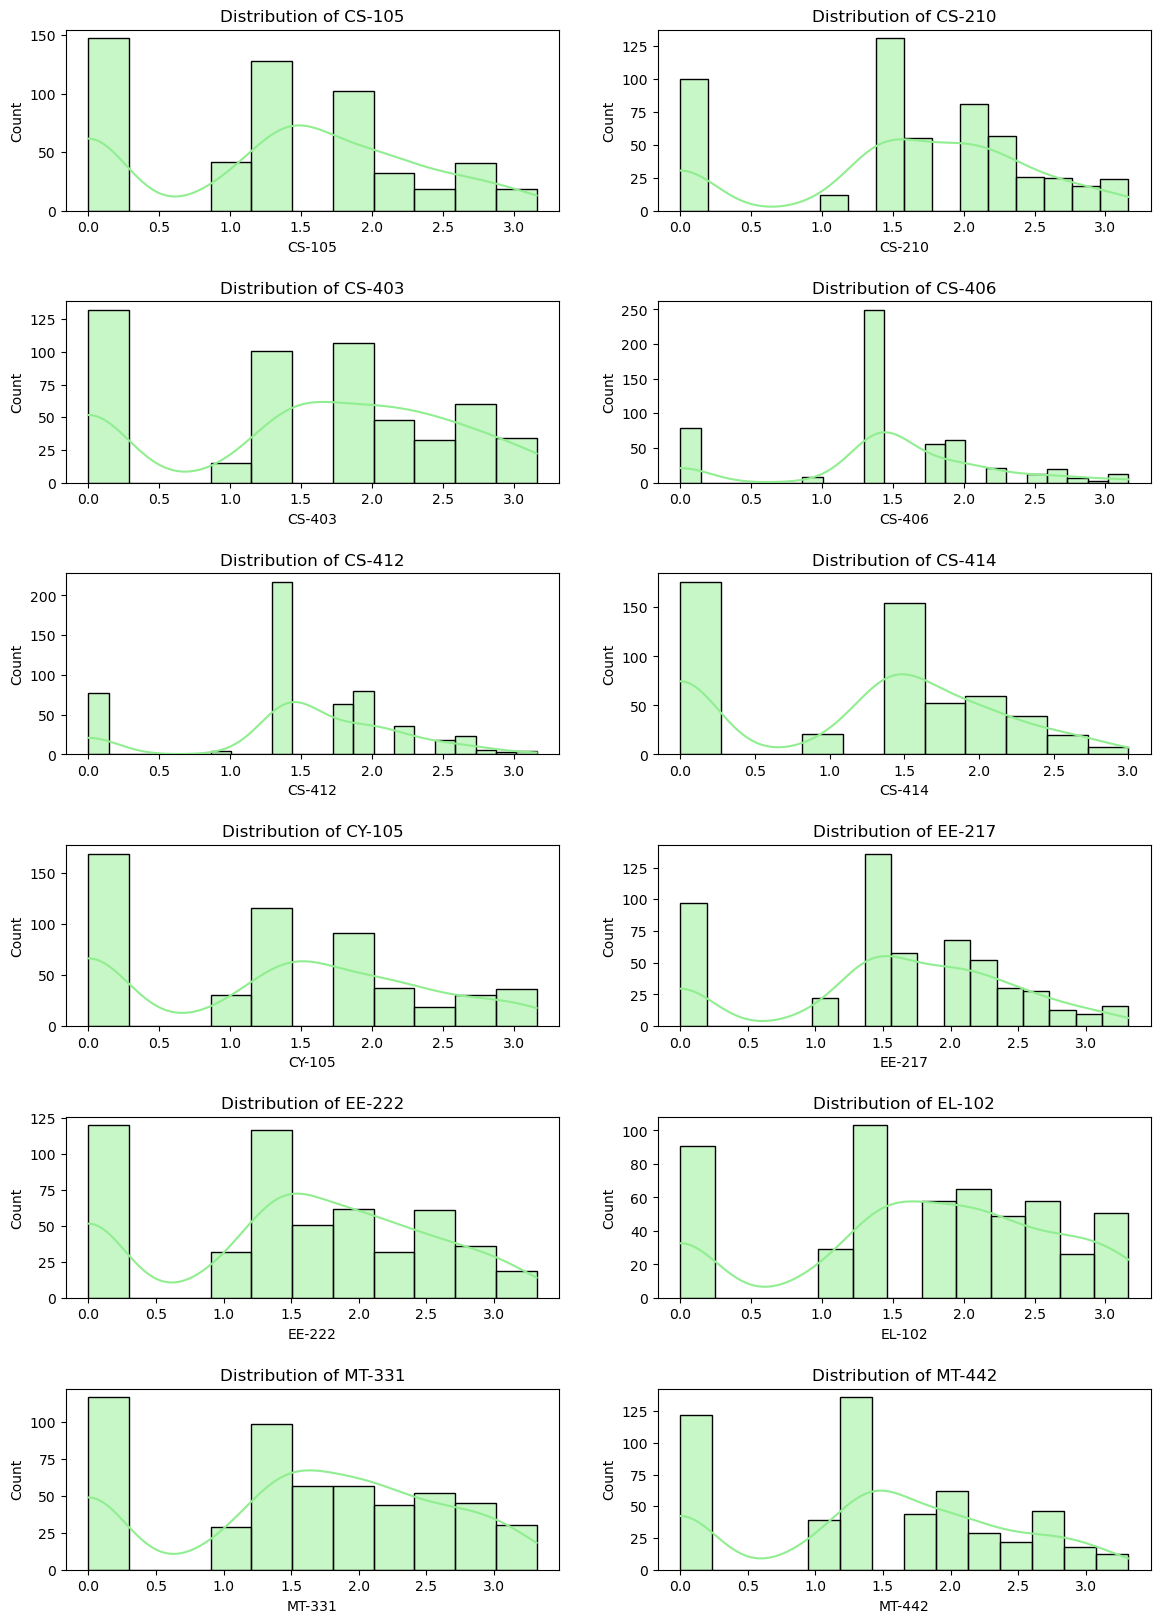

In [58]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(6, 2, figsize=(14, 20))
for ax, column in zip(axs.flat, sqrt_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='lightgreen')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

# Muticollinearity Analysis and Feature Selection

# Separating features and label

In [59]:
# Separating the independent and target variables into x and y 
x = df.drop("CGPA", axis=1)
y = df['CGPA']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (530, 41)
Label Dimension = (530,)


# checking VIF variance inflation factor

In [60]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
35     CS-421   12.823666
33     CS-317   12.489840
15     CS-210   11.276027
20     CS-212   10.651567
18     CS-214   10.250248
21     CS-215   10.036742
25     CS-301    9.749571
24     HS-304    9.680682
40     CS-412    9.564056
31     CS-306    9.547637
32     CS-312    9.375585
16     CS-211    9.237993
38     CS-419    9.165252
29     EL-332    8.990999
30     CS-318    8.886318
23     EF-303    8.556196
19     EE-217    8.318530
0      PH-121    8.285752
27     TC-383    8.046166
14     MT-224    8.041968
26     CS-302    7.896308
9      ME-107    7.674223
36     CS-406    7.636489
34     CS-403    7.586787
39     CS-423    7.544269
17     CS-203    7.369745
1      HS-101    7.364718
7      EL-102    7.177397
13     EE-222    7.024570
4      MT-111    6.999744
12     MT-222    6.838263
22     MT-331    6.662647
8      EE-119    6.620538
28     MT-442    6.409329
3   HS-105/12    6.385466
2      CY-105    6.358717
6      CS-106    6.345389
5      CS-105    6.027823
10     CS-107    5.809890
37     CS-414    5.004315
11  HS-205/20    4.418658

By checking VIF values we can find the features causing multicollinearity problem. Here we can find the features CS-421, CS-317, CS-210, CS-212, CS-214, CS-215 have VIF value greater than 10 which means they have high correlation with other features.

We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [61]:
# Reviewing the correlation between label and the features with multicollinearity
corr_df[(corr_df['Feature A'] == 'CGPA') & (corr_df['Feature B'].isin(['CS-421', 'CS-317', 'CS-210', 'CS-212', 'CS-214', 'CS-215'])) ]

Feature A Feature B  Corr coef
1734      CGPA    CS-212  -0.670338
1740      CGPA    CS-421  -0.705442
1750      CGPA    CS-214  -0.750184
1754      CGPA    CS-215  -0.761122
1760      CGPA    CS-210  -0.796970
1762      CGPA    CS-317  -0.799364

In [62]:
# Dropping the columns with multicollinearity
x = x.drop(['CS-212','CS-421','CS-317','CS-210','CS-214'], axis=1) 

We dropped the columns 'CS-212','CS-421','CS-317','CS-210','CS-214' to solve the multicollinearity problem. The only feaute we could keep was CS-215 to achieve lower down the multicollinearity less than 10 for the remaining features.

In [63]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
21     HS-304    9.560219
22     CS-301    9.426931
18     CS-215    9.384601
35     CS-412    9.105049
26     EL-332    8.960218
15     CS-211    8.932135
28     CS-306    8.855110
33     CS-419    8.782530
27     CS-318    8.751875
29     CS-312    8.602404
20     EF-303    8.247801
0      PH-121    8.202628
17     EE-217    8.192798
24     TC-383    7.978959
14     MT-224    7.941664
9      ME-107    7.568817
23     CS-302    7.526505
31     CS-406    7.387847
30     CS-403    7.337012
34     CS-423    7.259577
1      HS-101    7.149691
7      EL-102    7.113915
4      MT-111    6.949102
16     CS-203    6.946841
13     EE-222    6.884789
12     MT-222    6.745609
19     MT-331    6.619429
8      EE-119    6.558970
25     MT-442    6.301710
2      CY-105    6.235545
6      CS-106    6.130461
3   HS-105/12    6.104495
5      CS-105    5.966851
10     CS-107    5.670939
32     CS-414    4.893515
11  HS-205/20    4.309658

Dropping 5 features solved multicollinearit issue. We can now move ahead fro model building. This represent 12.19% of data lost.

# Model Creation

In [64]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

In [65]:
#Finding the best random state
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.9813 at random_state 82


Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

# Train Test Split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (371, 36)
x_test shape:   (159, 36)
y_train shape:  (371,)
y_test shape:   (159,)


# Regrerssion Algos

In [67]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

# Linear Regression

In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

# Linear Regression
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}")
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

# Create a DataFrame from model_scores
model_scores = pd.DataFrame([{'id': 'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)': r2_score_val, 'CV_Mean': scores.mean()}])

# Concatenate the new model_scores DataFrame with eval_model
eval_model = pd.concat([eval_model, model_scores], ignore_index=True)

print(eval_model)


LR coef_        : [-0.0148467  -0.00158952 -0.02550426 -0.00836095 -0.01301886 -0.01496808
 -0.00278353 -0.02039508 -0.01143484 -0.01339183 -0.01021884 -0.00918811
 -0.00903417 -0.02189714 -0.00790656 -0.00541212 -0.00976003 -0.02410635
 -0.01079894 -0.01464925 -0.01051079 -0.01475938 -0.01915333 -0.0152456
 -0.00532878 -0.00454788 -0.01035849 -0.0015969  -0.02299455 -0.00812831
 -0.01125739 -0.02039043 -0.02555325 -0.01065803 -0.00790192  0.00208132]

LR intercept_ : 4.279525087613749
LR score train  : 0.9757704025297923
LR score test   : 0.9813287244464604
********** E R R O R **********
Mean squared error: 0.0061
Root Mean squared error: 0.0779
Cross-validation results (R2): [0.97784779 0.96886418 0.97968976 0.98243732 0.96964717 0.97150714
 0.97223663 0.96700923 0.97591579 0.95706824]
Average R2: 0.9722
R2_Score(test): 0.9813
                 id               Model      RMSE  R2_Score(test)   CV_Mean
0  LinearRegression  LinearRegression()  0.077855        0.981329  0.972222


# Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rfr = RandomForestRegressor()

# Define the parameter grid
parameters = {
    'n_estimators': [100, 600, 1000],  # Number of trees in the forest
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider for the best split
    'max_depth': [None, 40, 50, 60],  # Maximum depth of the trees
    'min_samples_split': [5, 7, 9],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [7, 10, 12],  # Minimum number of samples required to be at a leaf node
    'criterion': ['squared_error'],  # Function to measure the quality of a split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Setup GridSearchCV
grid_cv = GridSearchCV(estimator=rfr, param_grid=parameters, cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_cv.fit(x_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_cv.best_params_)
print("Best score: ", grid_cv.best_score_)


Best parameters found:  {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 60, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 600}
Best score:  0.9411034053684233


In [70]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='log2',
                      min_samples_leaf=7, min_samples_split=7,
                      n_estimators=600)

In [89]:
best_params = grid_cv.best_params_
best_estimator = grid_cv.best_estimator_
best_score = grid_cv.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")


Best parameters : {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 60, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 600}
Best score : 0.9411034053684233
Best Estimator:  RandomForestRegressor(bootstrap=False, max_depth=60, max_features='log2',
                      min_samples_leaf=7, min_samples_split=7,
                      n_estimators=600)
********** E R R O R **********
Mean squared error: 0.0165
Root Mean squared error: 0.1283
Cross-validation results (R2): 0.9411034053684233
Average R2: 0.9411
R2_Score(test): 0.9493


# Decision Tree Rwgressor

In [90]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")


********** E R R O R **********
Mean squared error: 0.0565
Root Mean squared error: 0.2376
Cross-validation results (R2): [0.79155094 0.78339474 0.82464572 0.79784174 0.74437367]
Average R2: 0.7884
R2_Score(test): 0.8260


# K-Nearest Neighbor Regressor

In [91]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")


********** E R R O R **********
Mean squared error: 0.0149
Root Mean squared error: 0.1221
Cross-validation results (R2): [0.95805733 0.94232324 0.95179049 0.93958587 0.92439426]
Average R2: 0.9432
R2_Score(test): 0.9541


# Gradient Boost Regression

In [92]:
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")


********** E R R O R **********
Mean squared error: 0.0099
Root Mean squared error: 0.0997
Cross-validation results (R2): [0.95942047 0.96856683 0.96609871 0.95471485 0.95136862]
Average R2: 0.9600
R2_Score(test): 0.9694


# Lasso

In [93]:
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")


********** E R R O R **********
Mean squared error: 0.2241
Root Mean squared error: 0.4734
Cross-validation results (R2): [0.25721633 0.27239915 0.29643789 0.31637476 0.28157948]
Average R2: 0.2848
R2_Score(test): 0.3097


# Ridge cV

In [94]:
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")


********** E R R O R **********
Mean squared error: 0.0061
Root Mean squared error: 0.0779
Cross-validation results (R2): [0.97042798 0.98189326 0.96949897 0.96677453 0.96534625]
Average R2: 0.9708
R2_Score(test): 0.9813


# Support Vector Regressor

In [95]:
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")


********** E R R O R **********
Mean squared error: 0.0098
Root Mean squared error: 0.0988
Cross-validation results (R2): [0.94608556 0.96834456 0.96588346 0.96201154 0.95529458]
Average R2: 0.9595
R2_Score(test): 0.9699


From the summary of models results and compare the cross-validation scores and R2 score, we conclude Linear Regression and Ridge could be selected as our best performing model.

In order to apply Hyper Parameter tunning we are going to select Ridge as our final model.

# Hyper Parameter Tuning

# Finding the best parameters for Linear Regression

In [80]:
random_state

82

In [81]:
# Linear Regression
param_grid = {'alpha': [1.0,.05,.4,2], 'fit_intercept':[True, False], 
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
            'positive': [False,True],
            'random_state': [1,4,10,20, 82]}

# Build the model 
model = Ridge()

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20, 82],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [82]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for Ridge model:")
best_params

Best Parameters for Ridge model:


{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'lsqr'}

In [83]:
best_model

Ridge(alpha=2, random_state=1, solver='lsqr')

# Final Model

In [84]:
# Create the model with the best parameters
best_model = Ridge(alpha = 2, fit_intercept = True, positive = False, random_state = 20, solver = 'saga')

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 98.13%


# Saving the model

In [86]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "student_grades_model.pkl")

['student_grades_model.pkl']

# Predicting using saved model

In [88]:
# Lets load the saved model and get the predictions
model = joblib.load("student_grades_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 98.133 %


0         1         2         3         4         5    \
Predicted  2.561039  2.550779  2.340697  3.910918  3.146899  2.839063   
Original   2.605000  2.621000  2.396000  3.844000  3.071000  2.756000   

                6         7         8         9    ...       149       150  \
Predicted  3.234632  2.973095  3.795428  3.436892  ...  2.833981  2.126767   
Original   3.226000  2.960000  3.765000  3.479000  ...  2.951000  2.042000   

                151       152       153       154       155       156  \
Predicted  4.080663  2.999011  2.193231  2.633524  3.406533  2.990085   
Original   3.963000  3.068000  2.206000  2.648000  3.396000  3.019000   

                157       158  
Predicted  3.414941  1.982311  
Original   3.325000  1.845000  

[2 rows x 159 columns]

These are the predicted values in a dataset to compared the prediction with the test data.

Final Conclusions:

1) The given dataset consists of 42 features, however, we are doing uni-variate analysis only on 41 features because the "Seat No." does not give much information for prediction. The target variable is continuous and all the independet variables are categorical.
2) For handling missing values, we drop 10 rows with a high percent of missing values per row and for the rest we impute with the most frequent value.
3) The final model is Ridge with a R2 score 98.13%
4) Eliminating the outliers represented the elimination of 5.53% of the total records (30 rows).
5) In order to avoid multicollinearity issue we drop 5 columns.
